In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:ylabel='Density'>

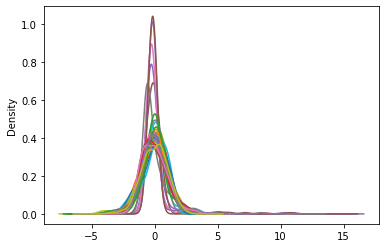

In [7]:
#improvement in density
sc = StandardScaler()
pf = sc.fit_transform(pd.read_csv('../Figures and tables/Tables/39traitsord.csv').iloc[:, 1:].values)
pd.DataFrame(pf).plot(kind='kde', legend = False)

<AxesSubplot:ylabel='Density'>

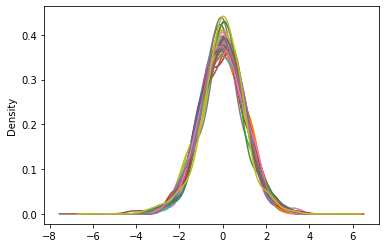

In [8]:
pd.read_csv('../Figures and tables/Tables/39transbyWF2ord.csv', header = None).iloc[1:,1:].astype('float').plot(kind='kde', legend = False)

In [ ]:
#check residuals for normalcy

In [66]:
d1 = pd.read_csv('../Figures and tables/Tables/39traitsord.csv')
d2 = pd.read_csv('../Figures and tables/Tables/PredSNPeffects raw.csv')
d3 = pd.read_csv('../Figures and tables/Tables/39transbyWF2ord.csv')
d4 = pd.read_csv('../Figures and tables/Tables/PredSNPeffects trans.csv')
d3 = d3[d1.columns]
d4 = d4[d1.columns]

In [70]:
d5 = d1.iloc[:,1:] - d2.iloc[:,1:]
d6 = d3.iloc[:,1:] - d4.iloc[:,1:]
d7 = d2.iloc[:,1:]
d8 = d4.iloc[:,1:]

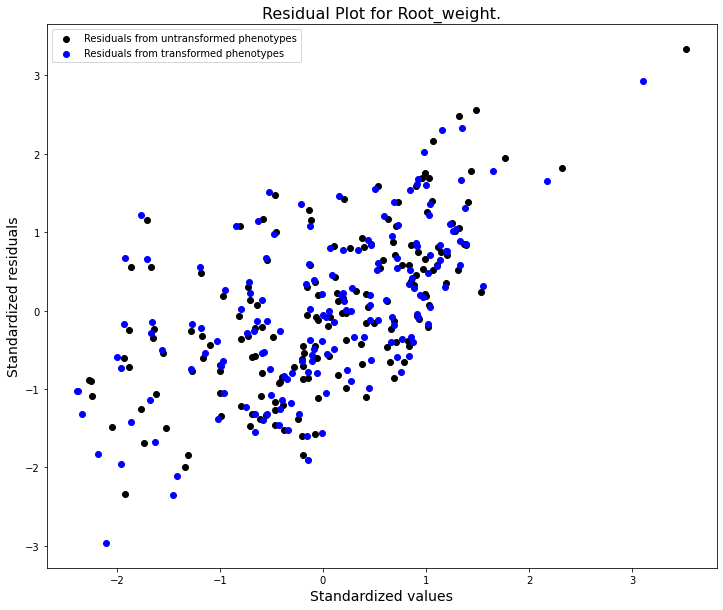

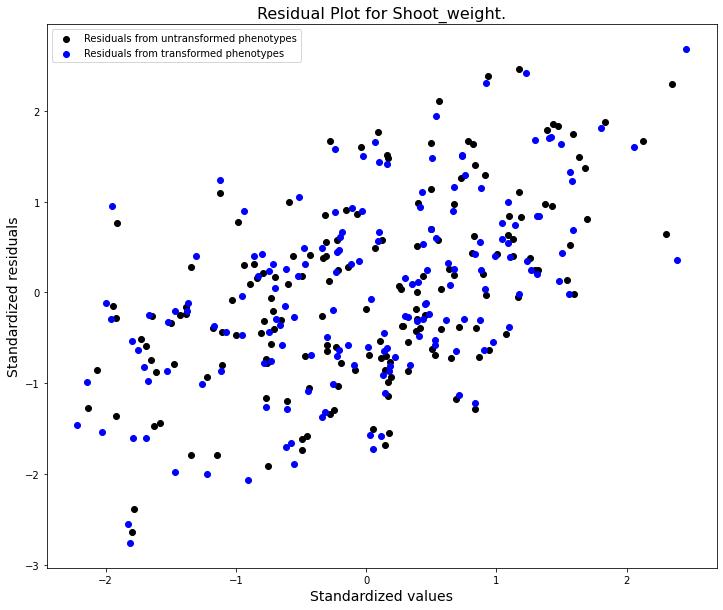

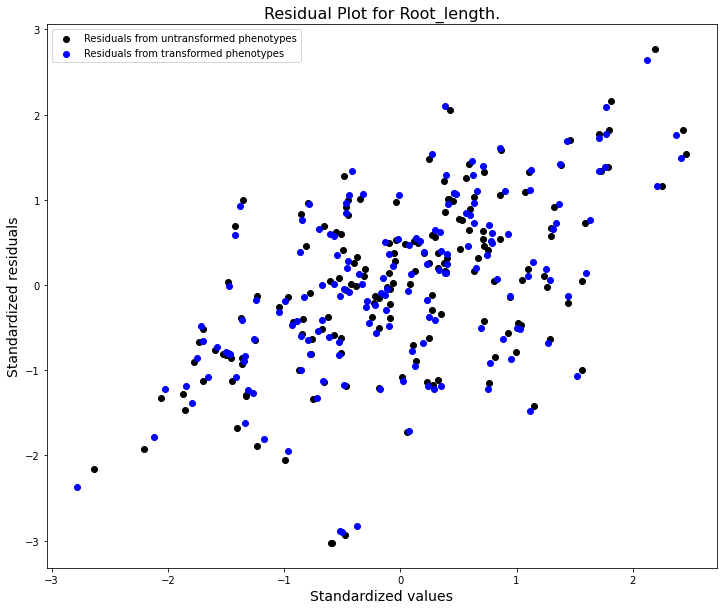

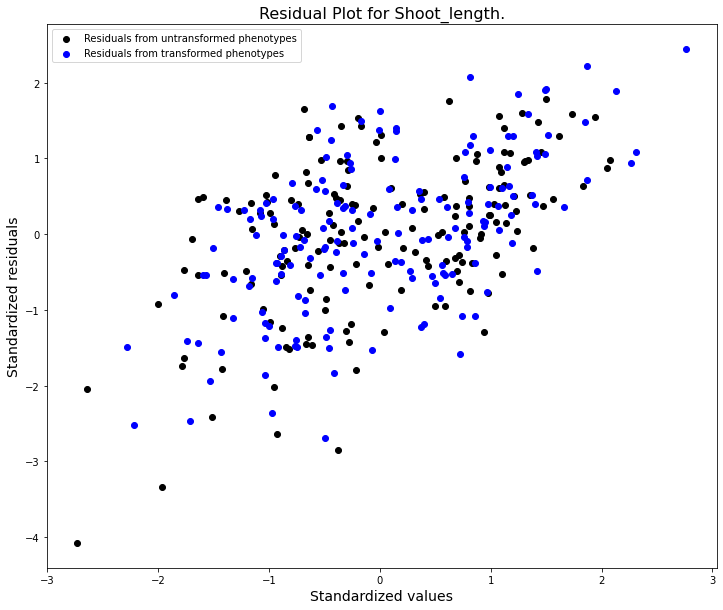

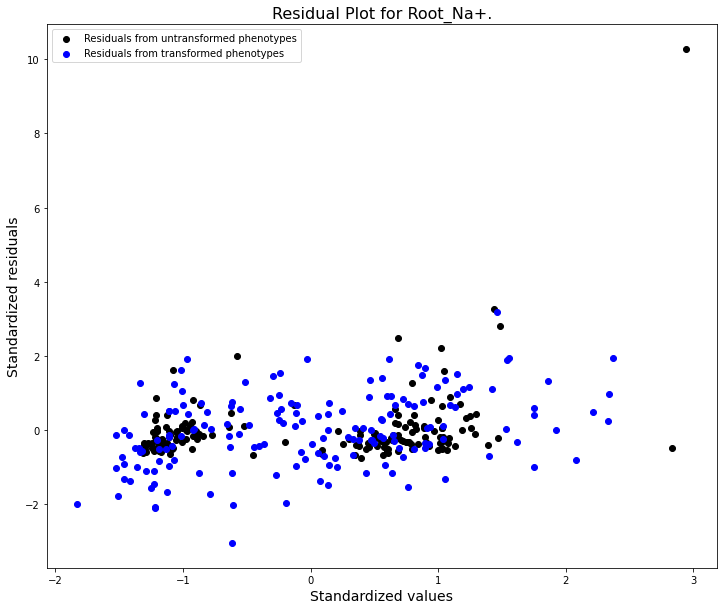

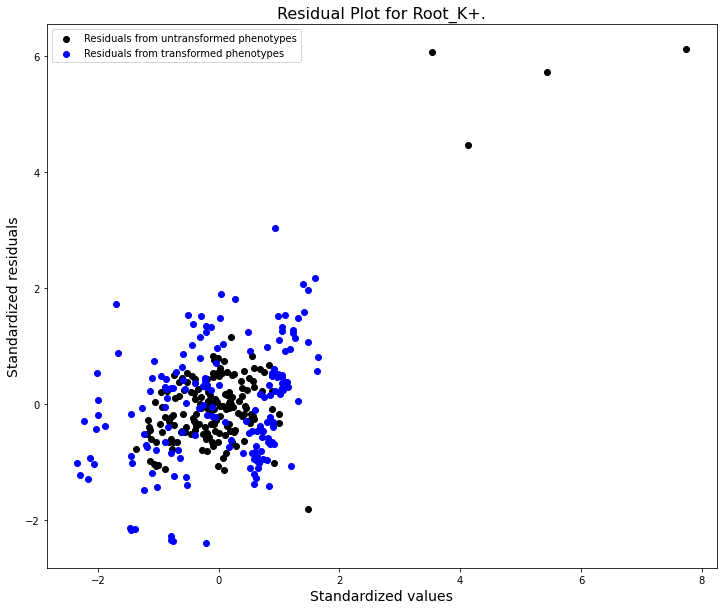

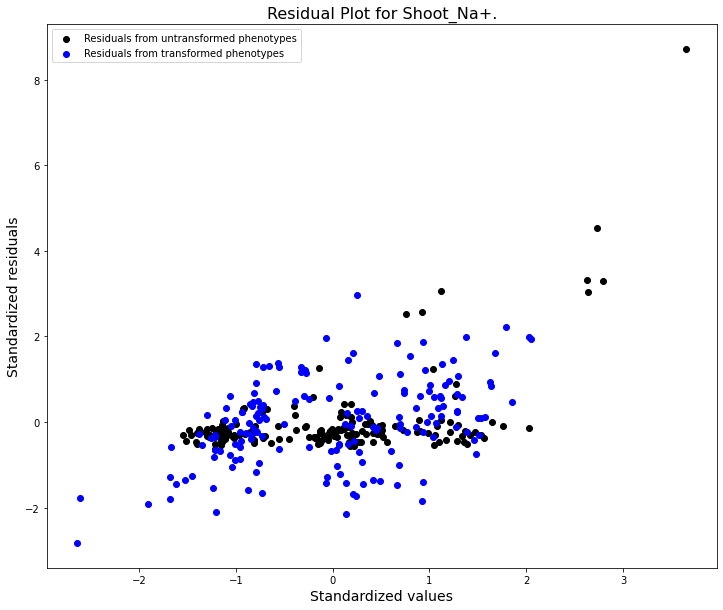

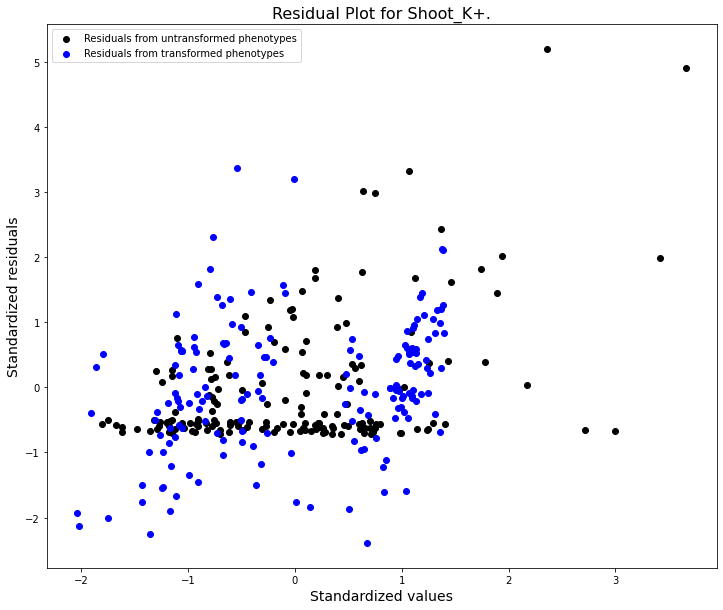

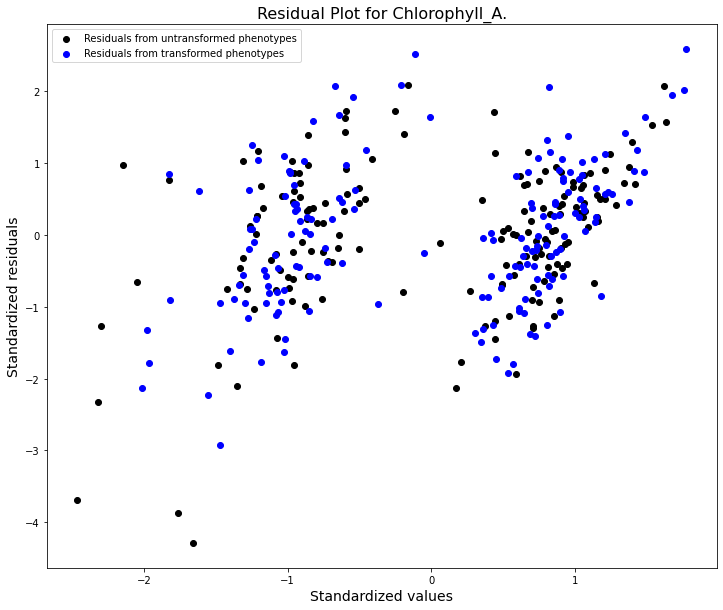

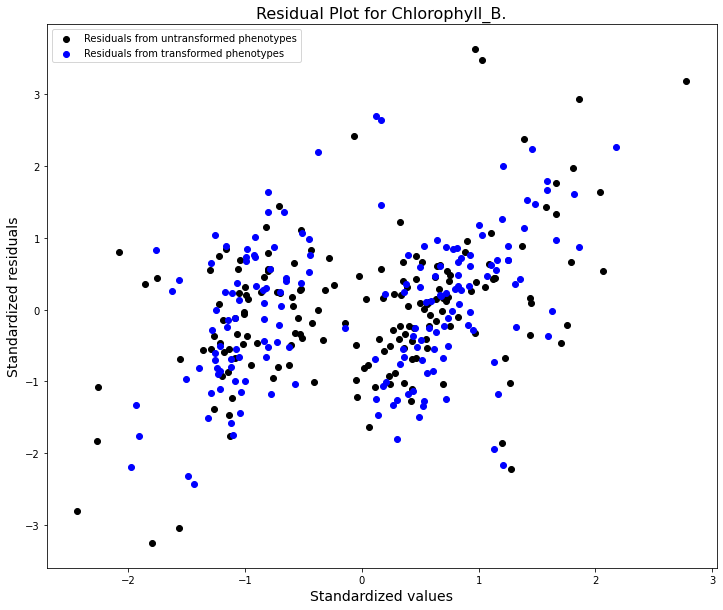

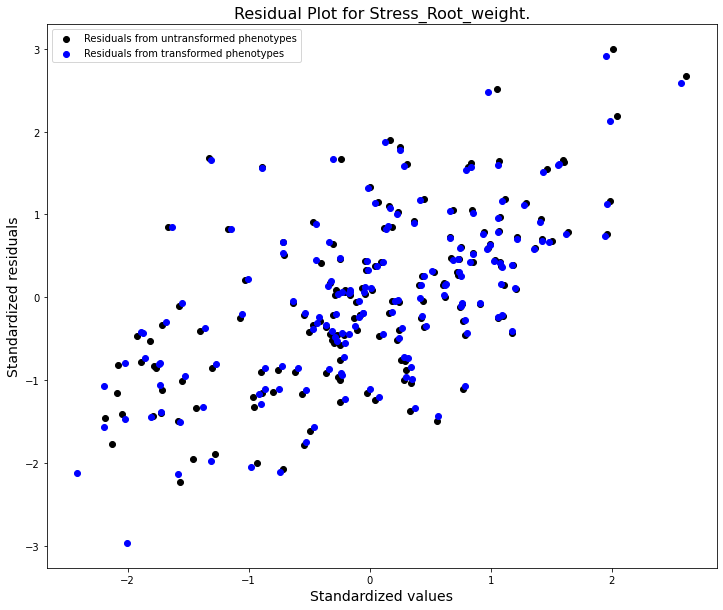

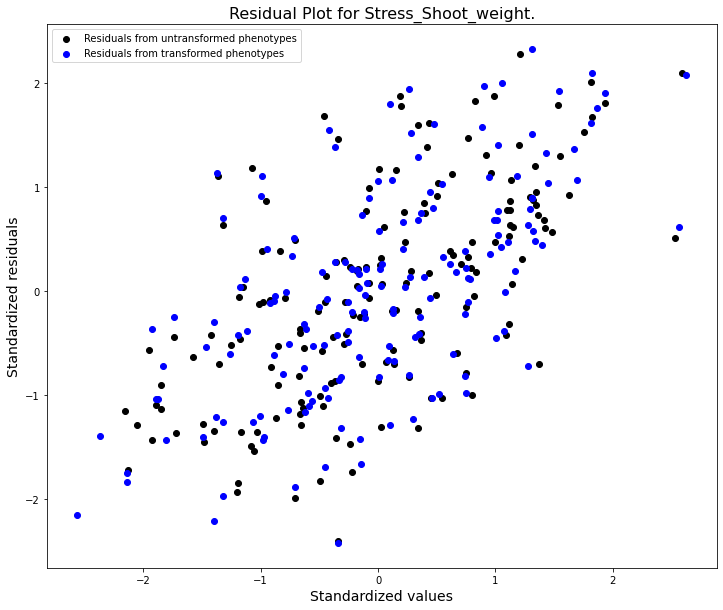

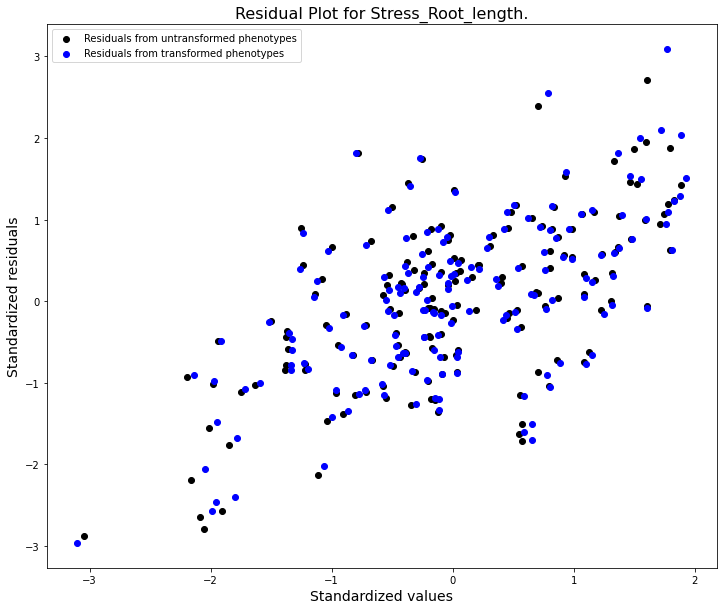

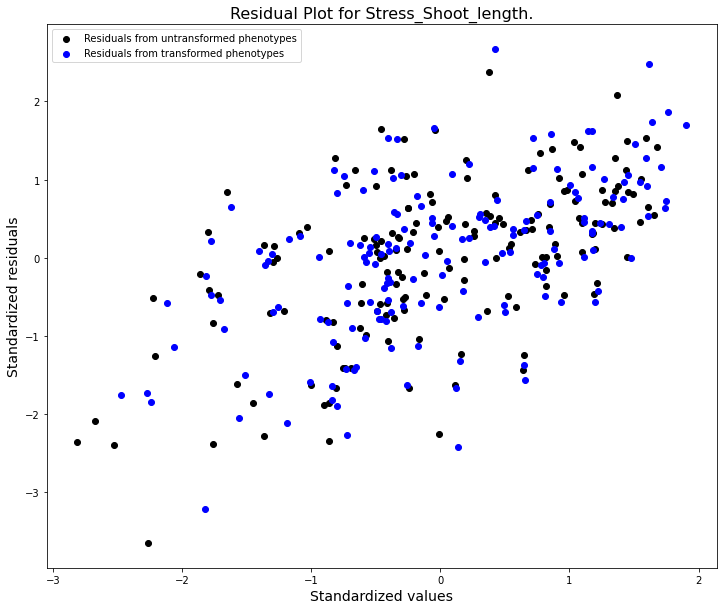

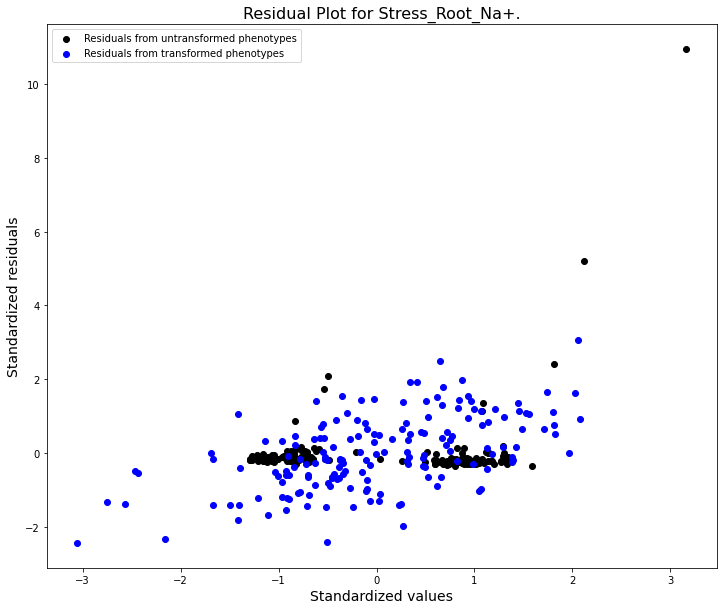

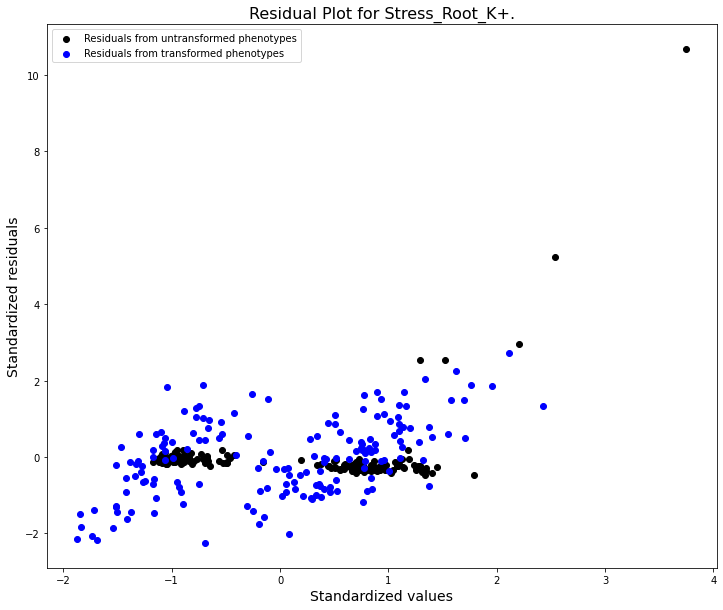

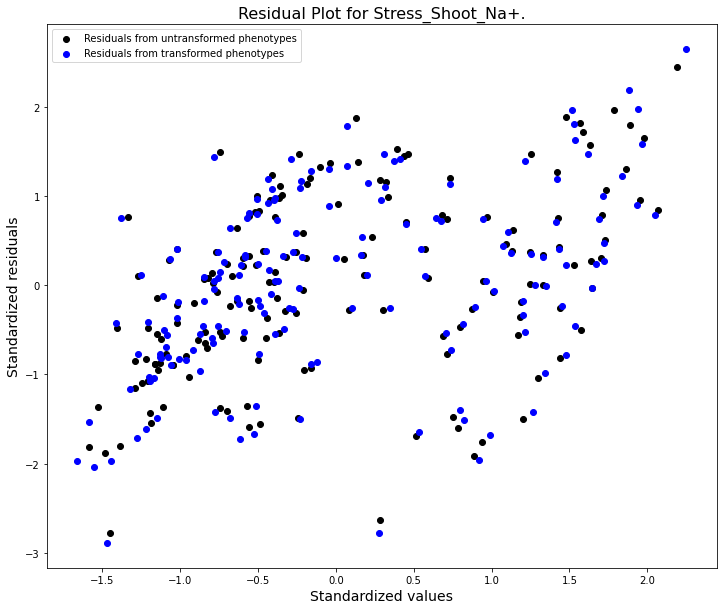

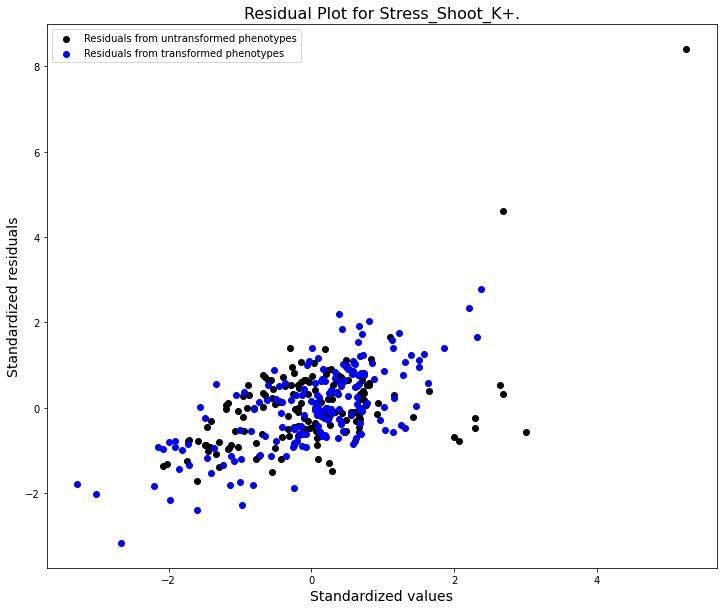

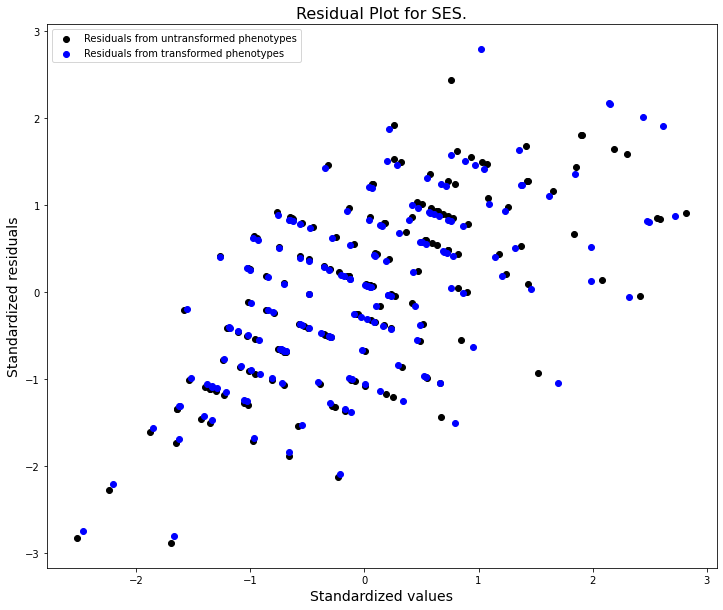

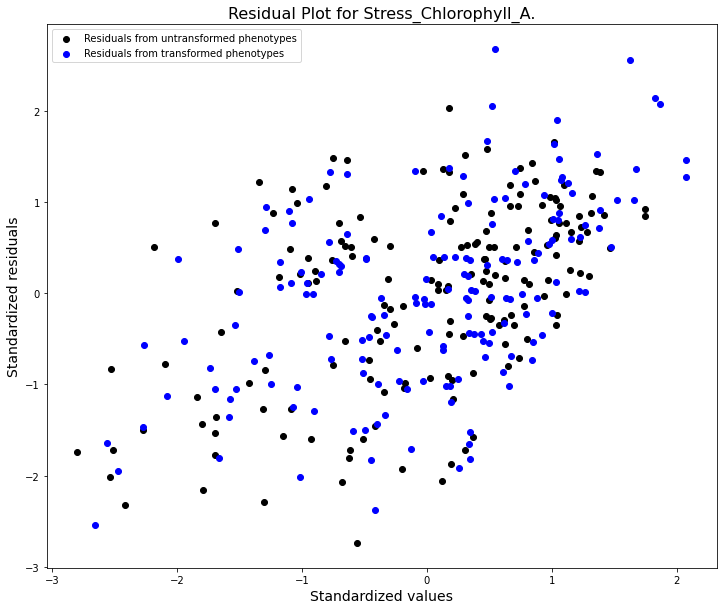

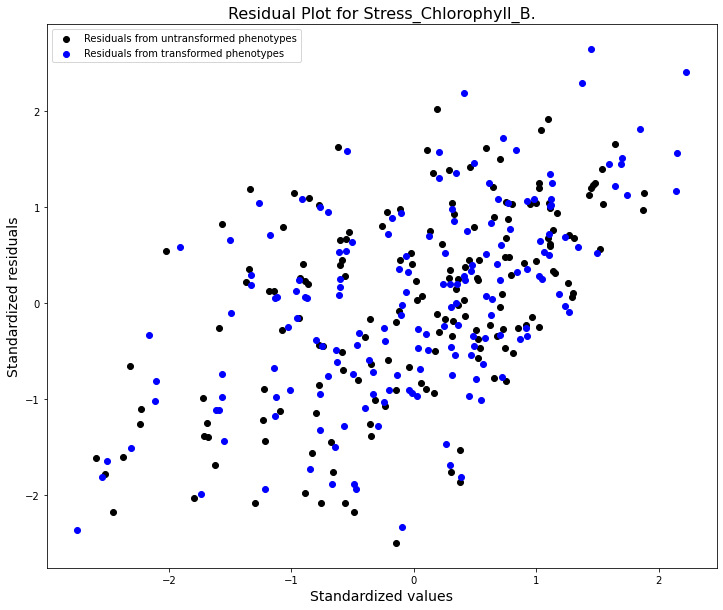

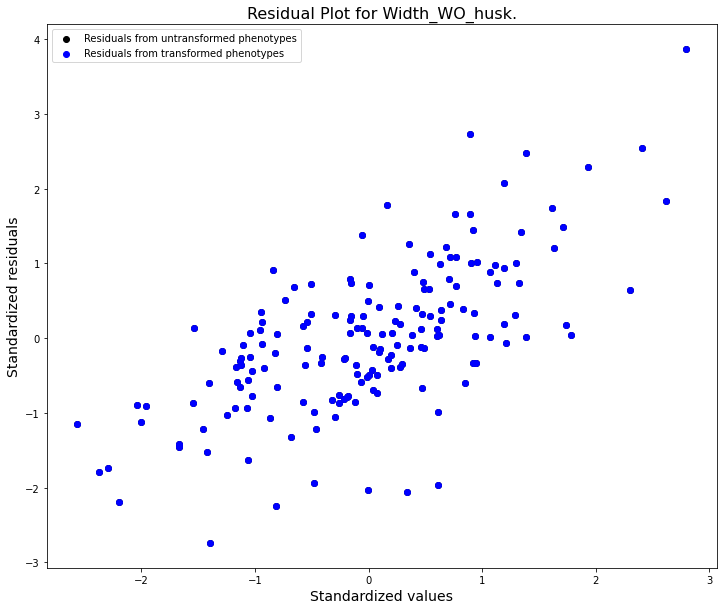

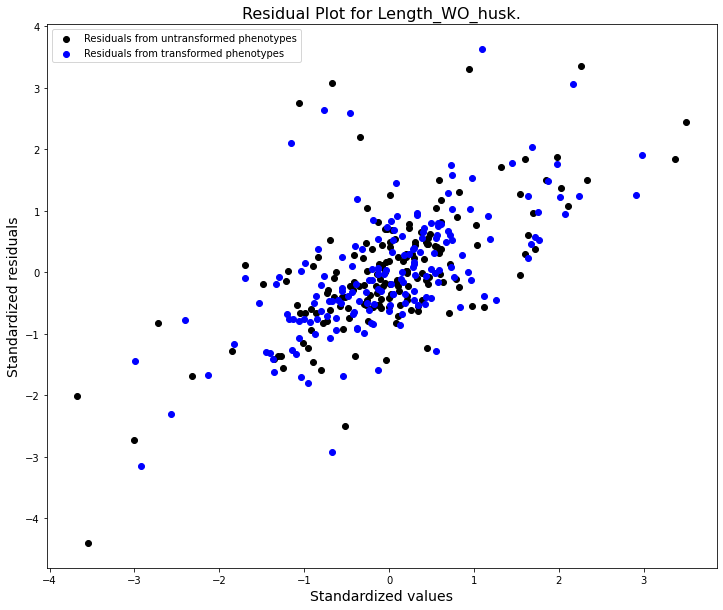

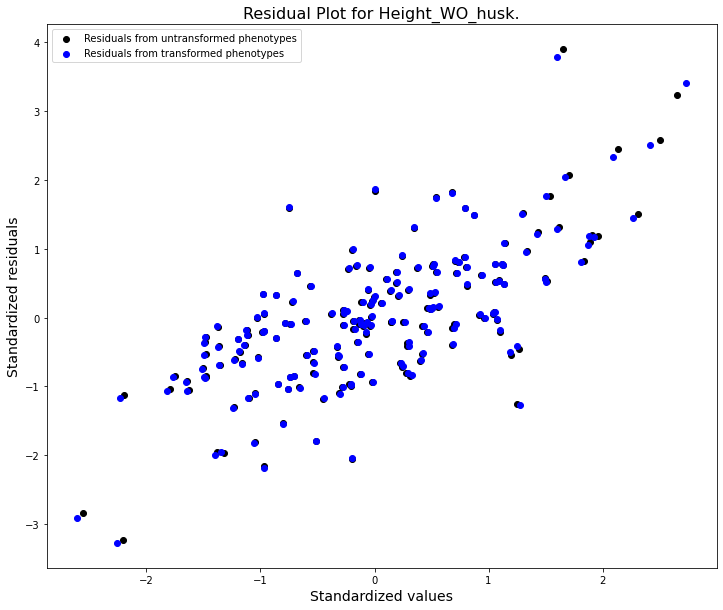

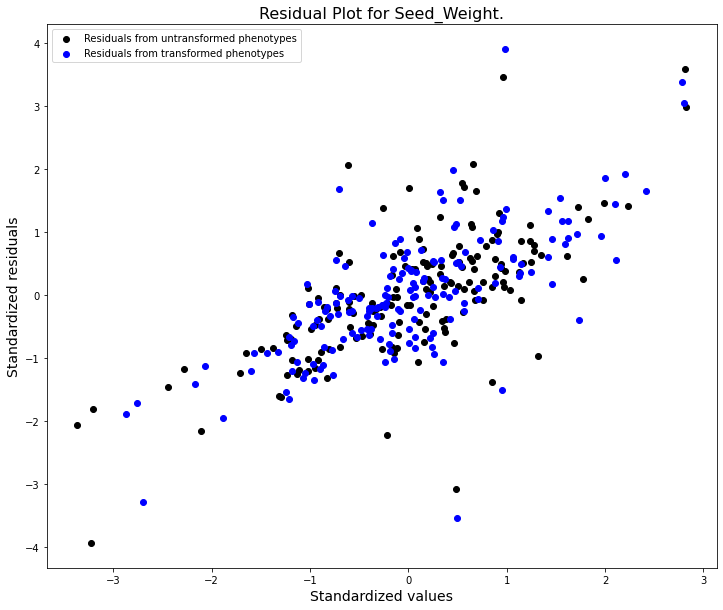

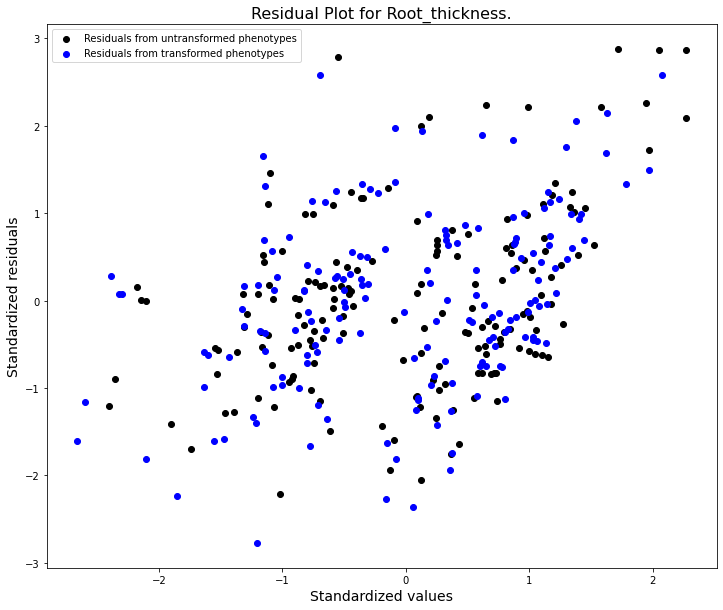

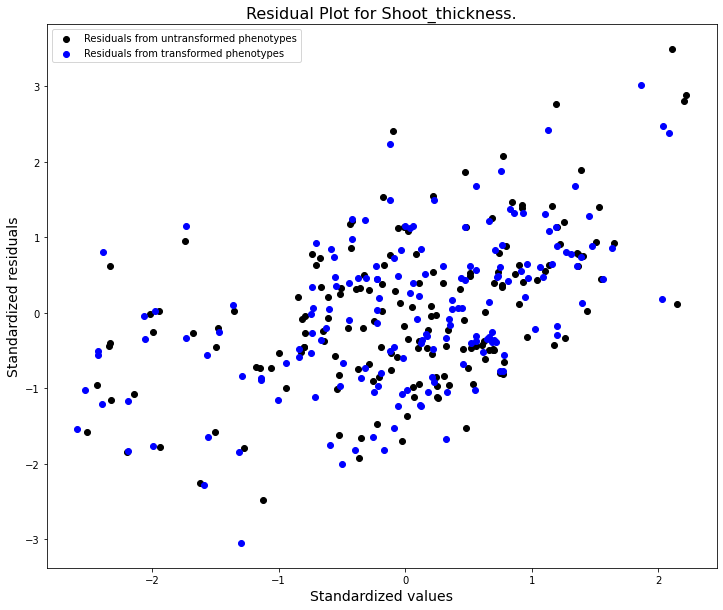

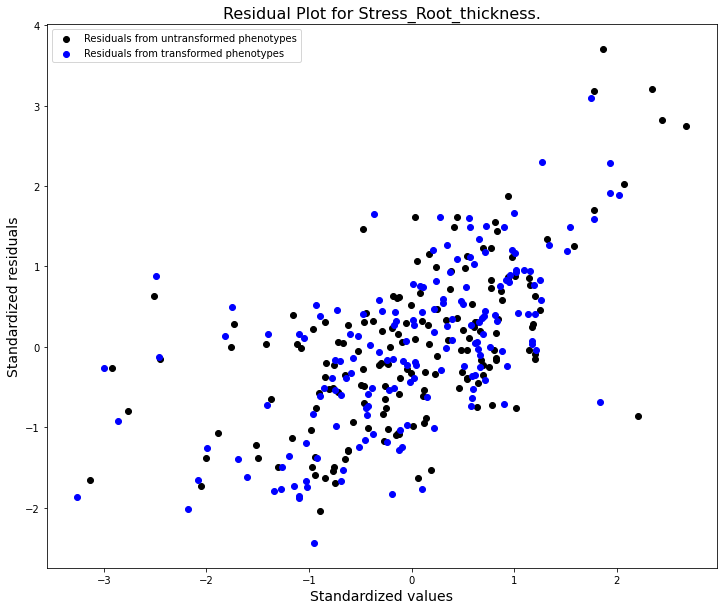

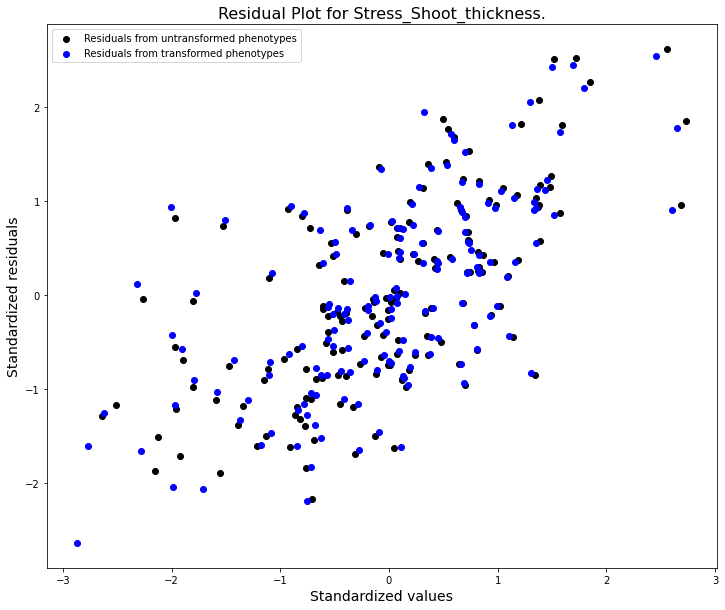

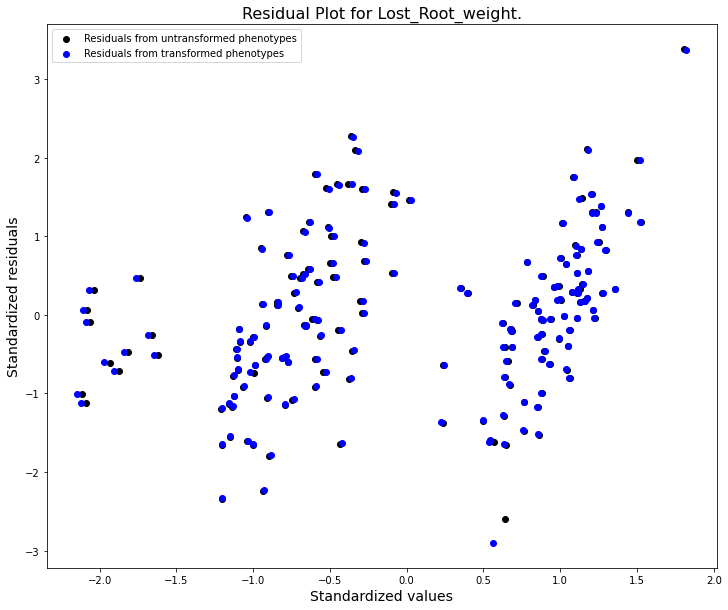

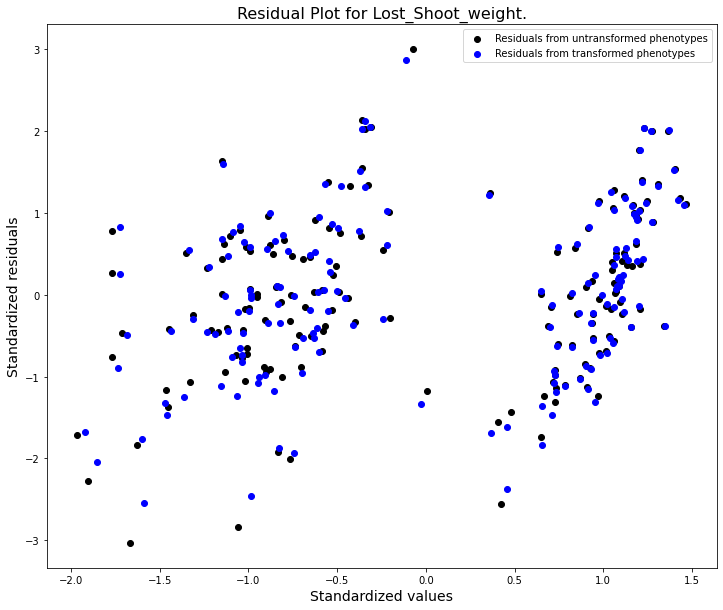

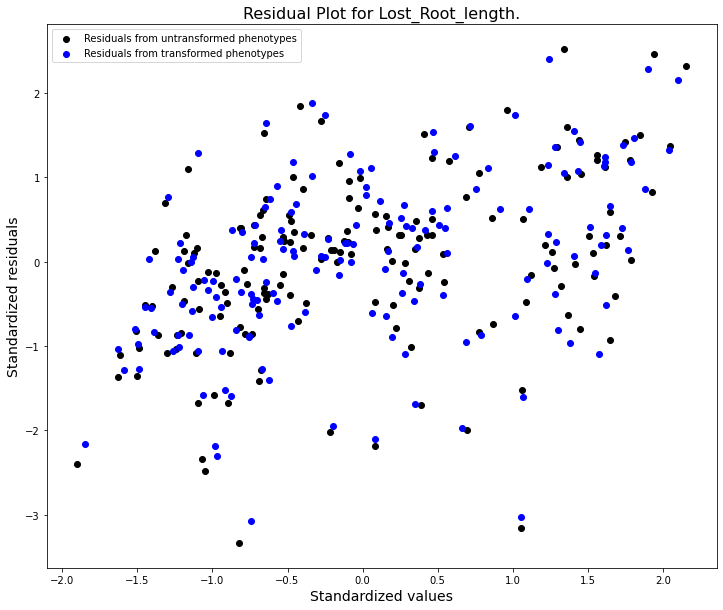

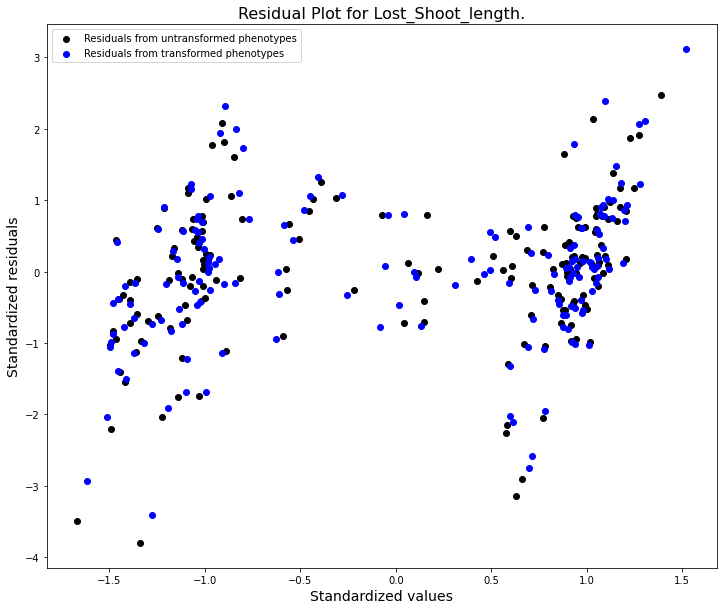

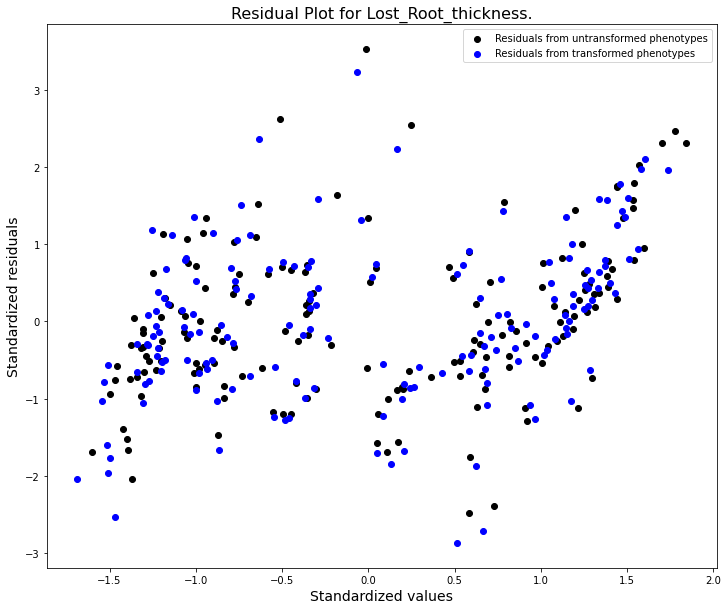

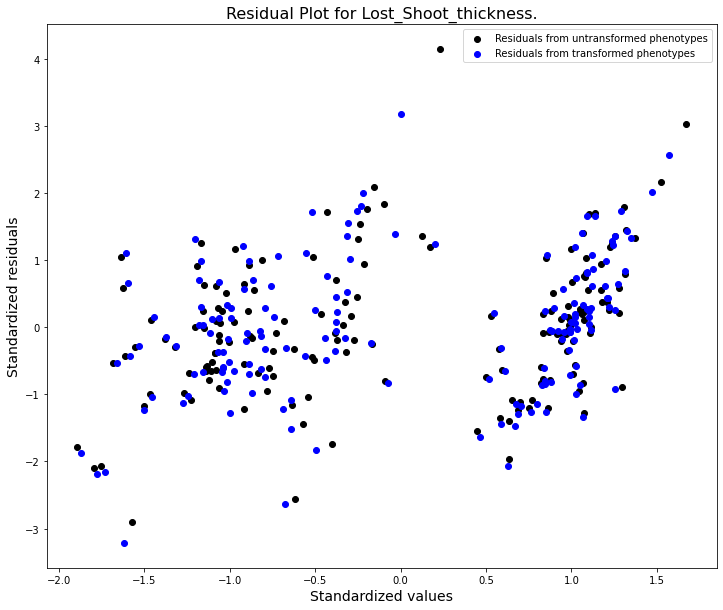

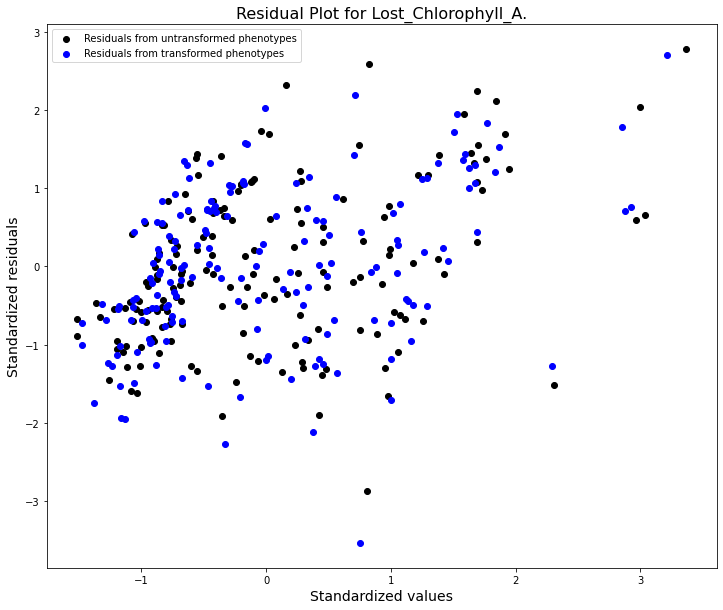

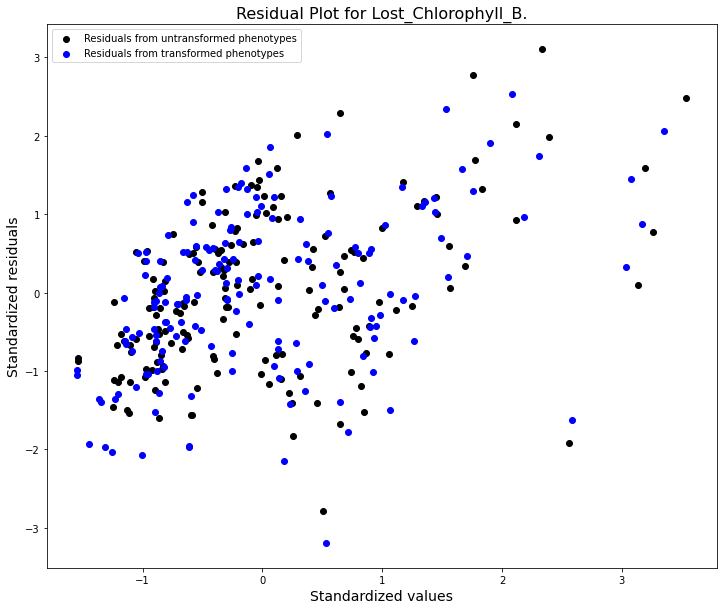

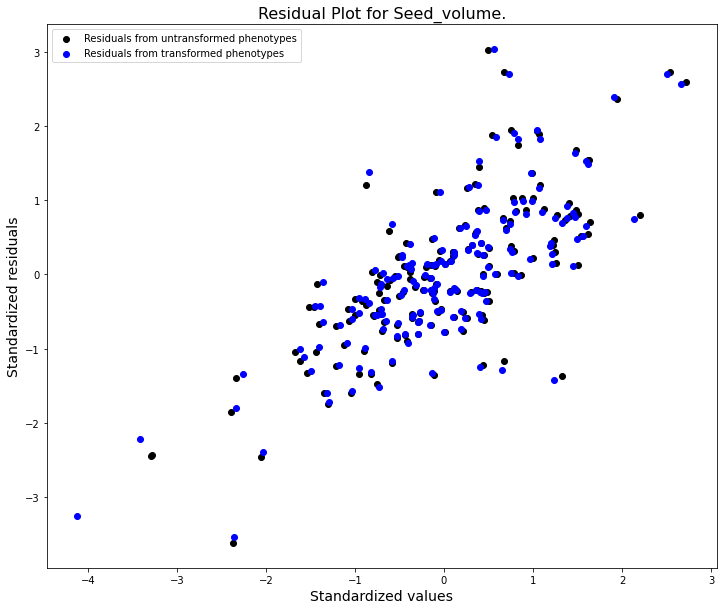

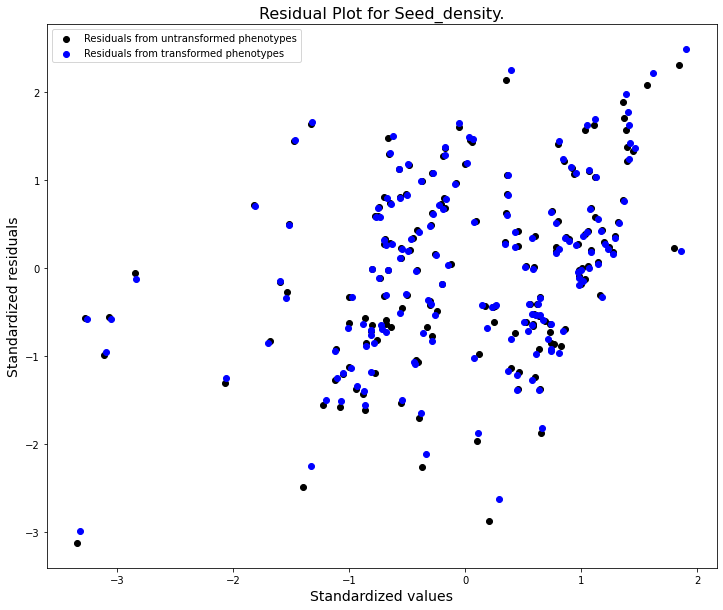

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in range(39):
    a = pd.DataFrame(scaler.fit_transform(pd.concat([d5.iloc[:,i], d6.iloc[:,i], d7.iloc[:,i], d8.iloc[:,i]], axis = 1).values))
    a.columns = ['Residuals from raw phenotypes', 'Residuals from transformed phenotypes', 'Predicted raw', 'Predicted transformed']
    plt.rcParams["figure.figsize"] = (12,10)
    plt.tight_layout()
    plt.scatter(a.iloc[:,2], a.iloc[:,0], color = 'black')    
    plt.scatter(a.iloc[:,3], a.iloc[:,1], color = 'blue')
    plt.legend(('Residuals from untransformed phenotypes','Residuals from transformed phenotypes'))
    plt.xlabel('Standardized values', fontsize = 14)
    plt.ylabel('Standardized residuals', fontsize = 14)
    plt.title('Residual Plot for %s.' %d1.columns[i+1], fontsize = 16)
    plt.savefig('temp2/(%d) Residual Plot for %s.png' %((i+1), d1.columns[i+1]), dpi=300)
    plt.show()

In [94]:
d4.loc[:,'Width_WO_husk']

0     -0.885627
1      0.378450
2      0.513569
3      1.048904
4      2.280476
         ...   
171         NaN
172    0.245143
173    0.096740
174    1.311615
175   -1.107783
Name: Width_WO_husk, Length: 176, dtype: float64

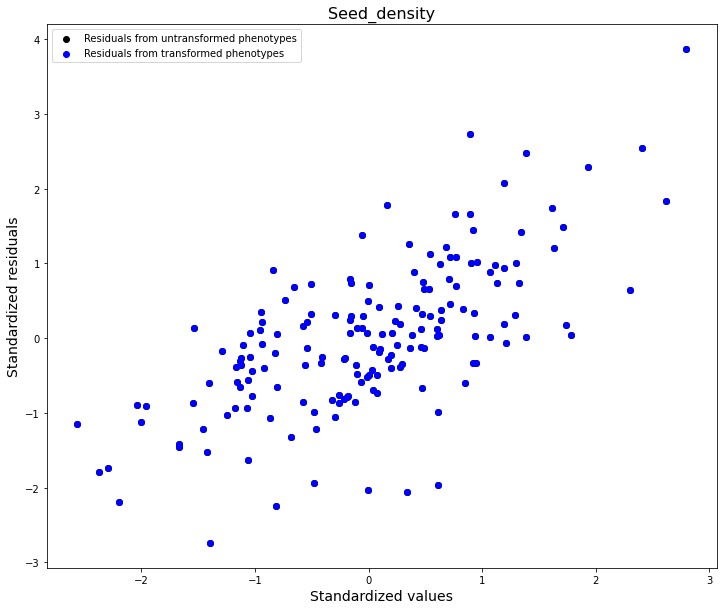

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = pd.DataFrame(scaler.fit_transform(pd.concat([d5.loc[:,'Width_WO_husk'], 
                                                 d6.loc[:,'Width_WO_husk'], 
                                                 d7.loc[:,'Width_WO_husk'], 
                                                 d8.loc[:,'Width_WO_husk']], axis = 1).values))
a.columns = ['Residuals from raw phenotypes', 'Residuals from transformed phenotypes', 'Predicted raw', 'Predicted transformed']
plt.rcParams["figure.figsize"] = (12,10)
plt.tight_layout()
plt.scatter(a.iloc[:,2], a.iloc[:,0], color = 'black')    
plt.scatter(a.iloc[:,3], a.iloc[:,1], color = 'blue')
plt.legend(('Residuals from untransformed phenotypes','Residuals from transformed phenotypes'))
plt.xlabel('Standardized values', fontsize = 14)
plt.ylabel('Standardized residuals', fontsize = 14)
plt.title(d1.columns[i+1], fontsize = 16)
#plt.savefig('temp2/%s.png' %d1.columns[i+1], dpi=300)
plt.show()

In [ ]:
#make corrplots

In [3]:
df = pd.read_csv('../Figures and tables/Tables/PredSNPeffects raw.csv')

In [4]:
df2 = df.loc[:, ['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length', 'Shoot_length',
                 'Stress_Root_weight', 'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
                'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Chlorophyll_A', 'Stress_Chlorophyll_B',
                'Seed_Weight', 'SES']]

In [5]:
df2.columns = ['Accession name', 'Root weight (RW)', 'Shoot weight (SW)', 'Root length (RL)', 'Shoot length (SL)',
                 'Stress Root weight (SRW)', 'Stress Shoot weight (SSW)', 'Stress Root length (SRL)', 
               'Stress Shoot length (SSL)', 'Chlorophyll A content (CA)', 'Chlorophyll B content (CB)', 
               'Stress Chlorophyll A content (SCA)', 'Stress Chlorophyll B content (SCB)', 'Seed Weight (SdW)', 'SES']

In [6]:
df3 = pd.read_csv('../Figures and tables/Tables/39traitsord.csv')

In [7]:
df4 = df3.loc[:, ['accession_name', 'Root_weight', 'Shoot_weight', 'Root_length', 'Shoot_length',
                 'Stress_Root_weight', 'Stress_Shoot_weight', 'Stress_Root_length', 'Stress_Shoot_length',
                'Chlorophyll_A', 'Chlorophyll_B', 'Stress_Chlorophyll_A', 'Stress_Chlorophyll_B',
                'Seed_Weight', 'SES']]

In [8]:
df4.columns = ['Accession name', 'Root weight (RW)', 'Shoot weight (SW)', 'Root length (RL)', 'Shoot length (SL)',
                 'Stress Root weight (SRW)', 'Stress Shoot weight (SSW)', 'Stress Root length (SRL)', 
               'Stress Shoot length (SSL)', 'Chlorophyll A content (CA)', 'Chlorophyll B content (CB)', 
               'Stress Chlorophyll A content (SCA)', 'Stress Chlorophyll B content (SCB)', 'Seed Weight (SdW)', 'SES']

In [63]:
df4.corr()

Root weight (RW)  Shoot weight (SW)  \
Root weight (RW)                            1.000000           0.791082   
Shoot weight (SW)                           0.791082           1.000000   
Root length (RL)                            0.535104           0.386963   
Shoot length (SL)                           0.629229           0.739880   
Stress Root weight (SRW)                    0.577545           0.518446   
Stress Shoot weight (SSW)                   0.552441           0.619007   
Stress Root length (SRL)                    0.386356           0.321147   
Stress Shoot length (SSL)                   0.468980           0.533624   
Chlorophyll A content (CA)                  0.354732           0.427399   
Chlorophyll B content (CB)                  0.301643           0.378668   
Stress Chlorophyll A content (SCA)          0.426831           0.455543   
Stress Chlorophyll B content (SCB)          0.399613           0.438545   
Seed Weight (SdW)                           0.331919           0.400669   
SES                                        -0.376362          -0.391499   

                                    Root length (RL)  Shoot length (SL)  \
Root weight (RW)                            0.535104           0.629229   
Shoot weight (SW)                           0.386963           0.739880   
Root length (RL)                            1.000000           0.348247   
Shoot length (SL)                           0.348247           1.000000   
Stress Root weight (SRW)                    0.357450           0.450140   
Stress Shoot weight (SSW)                   0.217907           0.522682   
Stress Root length (SRL)                    0.501729           0.270225   
Stress Shoot length (SSL)                   0.201957           0.646445   
Chlorophyll A content (CA)                  0.225726           0.427353   
Chlorophyll B content (CB)                  0.164223           0.329734   
Stress Chlorophyll A content (SCA)          0.111222           0.405133   
Stress Chlorophyll B content (SCB)          0.118522           0.395272   
Seed Weight (SdW)                           0.258095           0.291195   
SES                                        -0.145121          -0.354474   

                                    Stress Root weight (SRW)  \
Root weight (RW)                                    0.577545   
Shoot weight (SW)                                   0.518446   
Root length (RL)                                    0.357450   
Shoot length (SL)                                   0.450140   
Stress Root weight (SRW)                            1.000000   
Stress Shoot weight (SSW)                           0.840875   
Stress Root length (SRL)                            0.548484   
Stress Shoot length (SSL)                           0.651222   
Chlorophyll A content (CA)                          0.175664   
Chlorophyll B content (CB)                          0.130430   
Stress Chlorophyll A content (SCA)                  0.654335   
Stress Chlorophyll B content (SCB)                  0.628019   
Seed Weight (SdW)                                   0.355727   
SES                                                -0.679635   

                                    Stress Shoot weight (SSW)  \
Root weight (RW)                                     0.552441   
Shoot weight (SW)                                    0.619007   
Root length (RL)                                     0.217907   
Shoot length (SL)                                    0.522682   
Stress Root weight (SRW)                             0.840875   
Stress Shoot weight (SSW)                            1.000000   
Stress Root length (SRL)                             0.470566   
Stress Shoot length (SSL)                            0.776052   
Chlorophyll A content (CA)                           0.194890   
Chlorophyll B content (CB)                           0.156133   
Stress Chlorophyll A content (SCA)                   0.774377   
Stress Chlorophyll B content (SCB)         

In [71]:
df.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [72]:
df2.columns == df4.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [65]:
#starter from https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

def makehm(cdf1, cdf2, title, sizex, fontx):

    fig, ax = plt.subplots(figsize=(12 *sizex, 10 *sizex))
    # mask
    mask = np.triu(np.ones_like(cdf1, dtype=np.bool))
    # adjust mask and df
    #mask = mask[1:, :-1]
    corr = cdf1.iloc[:,:].copy()
    # color map
    cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # plot heatmap
    sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
               linewidths=3, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": .8}, square=True)
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    # title
    plt.tight_layout()
    plt.title(title, loc='center', fontsize= 4 *fontx)
    plt.savefig('%s_1.png' %title, dpi=300)
    plt.show()
    
    fig, ax = plt.subplots(figsize=(12 *sizex, 10 *sizex))
    # mask
    mask = np.tril(np.ones_like(cdf2, dtype=np.bool))
    # adjust mask and df
    #mask = mask[1:, :-1]
    corr = cdf2.iloc[:,:].copy()
    # color map
    cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
    # plot heatmap
    sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
               linewidths=3, cmap=cmap, vmin=-1, vmax=1, 
               cbar_kws={"shrink": .8}, square=True)
    # ticks
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks)
    # title
    plt.tight_layout()
    plt.title(title, loc='center', fontsize= 4 *fontx)
    plt.savefig('%s_2.png' %title, dpi=300)
    plt.show()

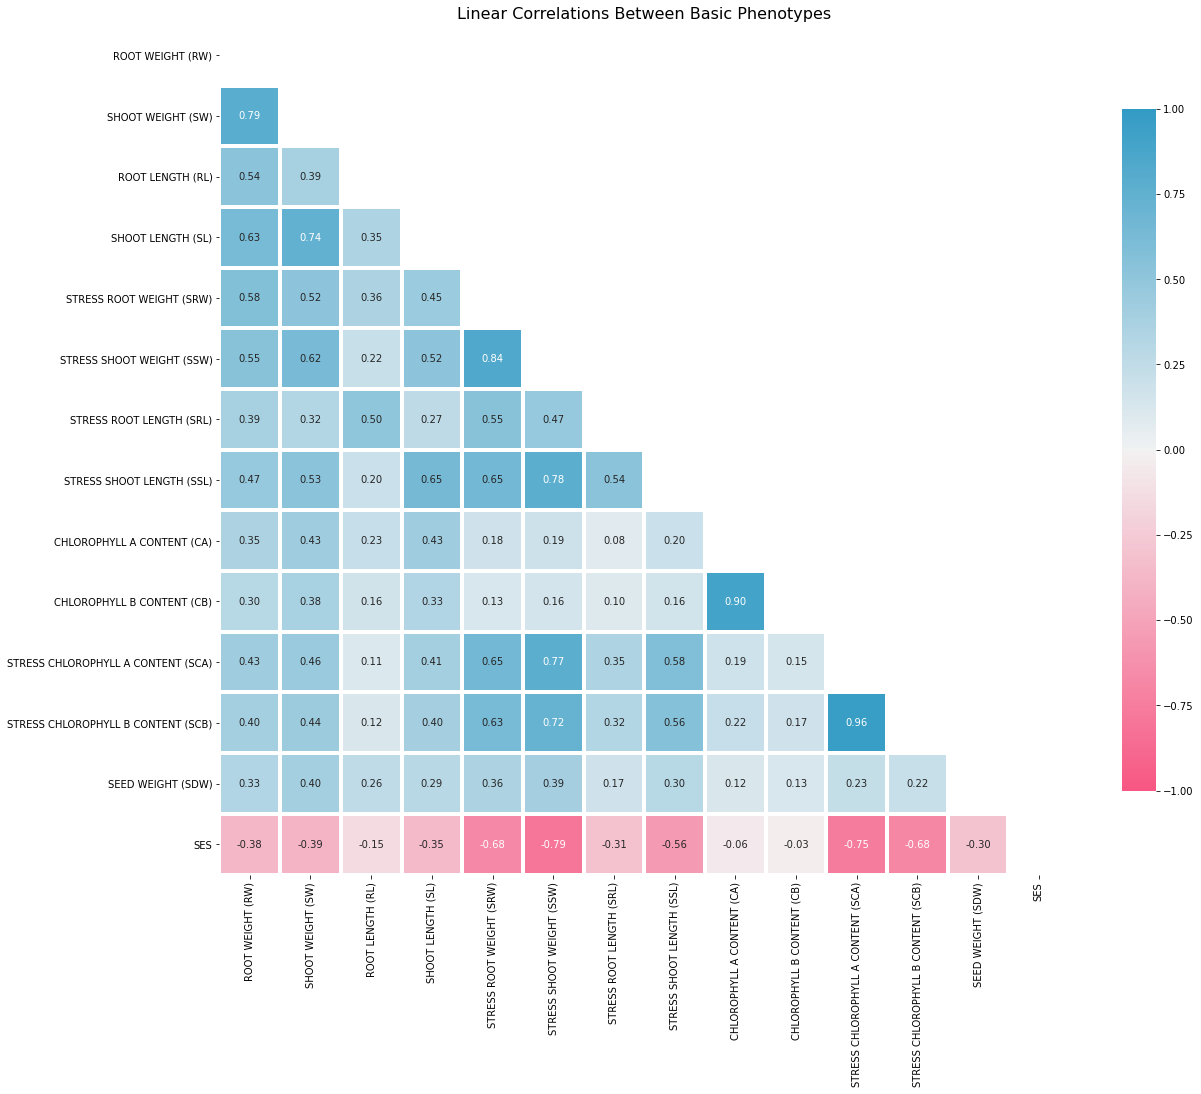

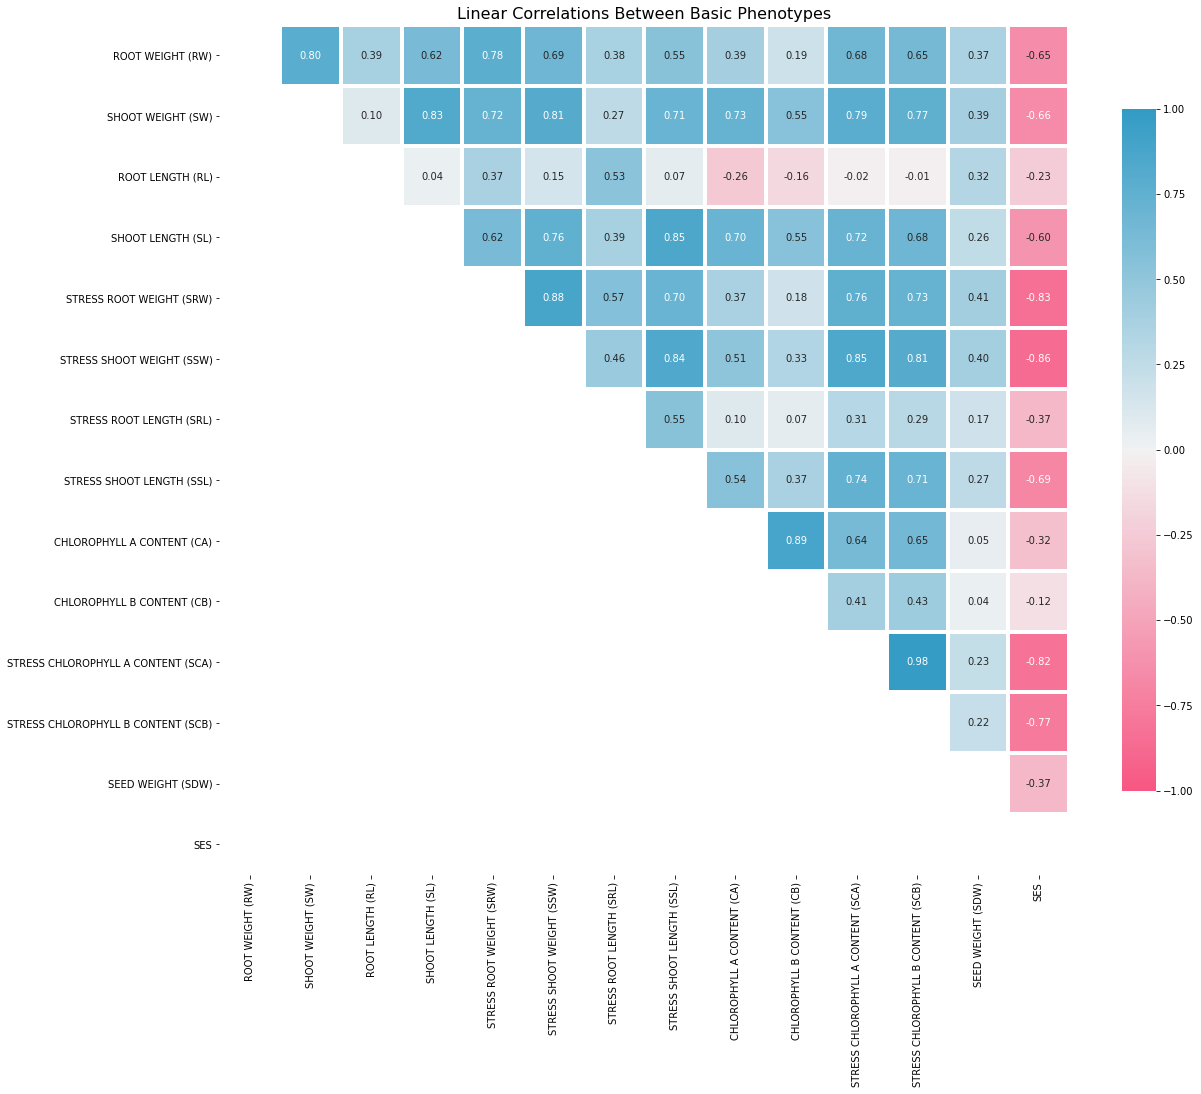

In [66]:
makehm(df4.corr(), df2.corr(), 'Linear Correlations Between Basic Phenotypes', 1.5, 4)

In [67]:
df2.corrwith(df4)

Root weight (RW)                      0.850134
Shoot weight (SW)                     0.813717
Root length (RL)                      0.833629
Shoot length (SL)                     0.830163
Stress Root weight (SRW)              0.814739
Stress Shoot weight (SSW)             0.878085
Stress Root length (SRL)              0.794221
Stress Shoot length (SSL)             0.885326
Chlorophyll A content (CA)            0.444848
Chlorophyll B content (CB)            0.566743
Stress Chlorophyll A content (SCA)    0.804486
Stress Chlorophyll B content (SCB)    0.837352
Seed Weight (SdW)                     0.999970
SES                                   0.829150
dtype: float64

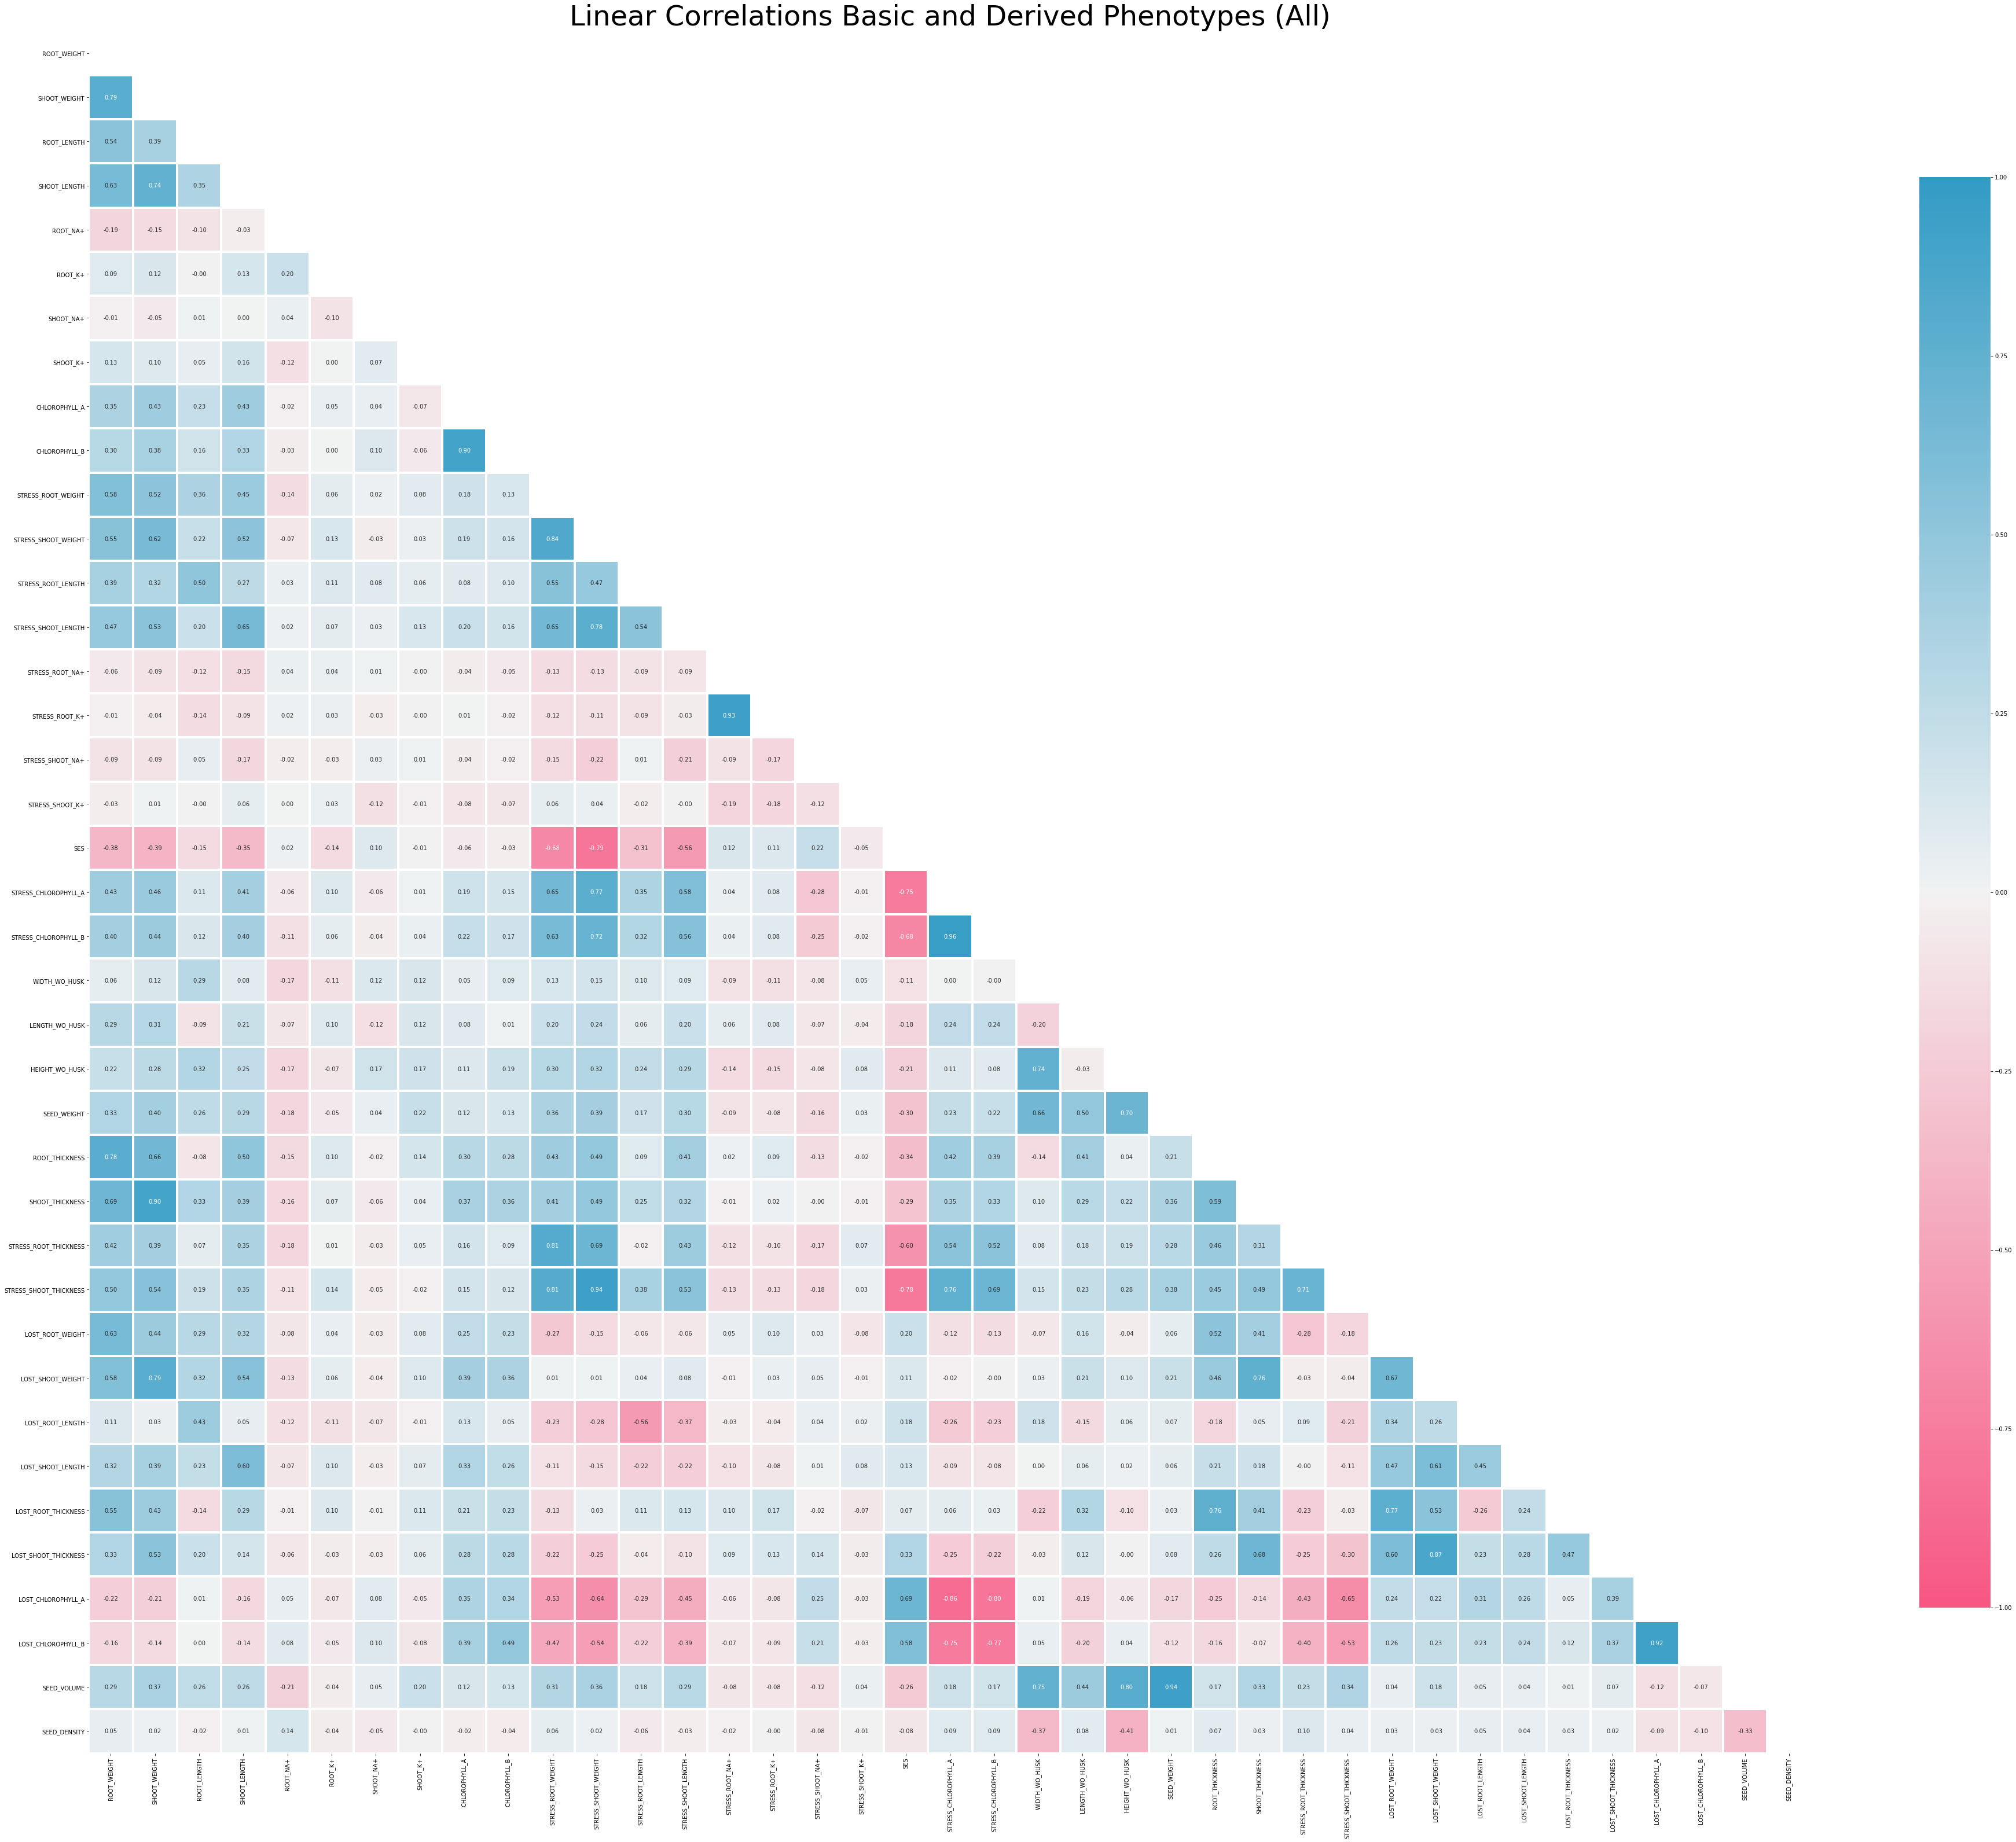

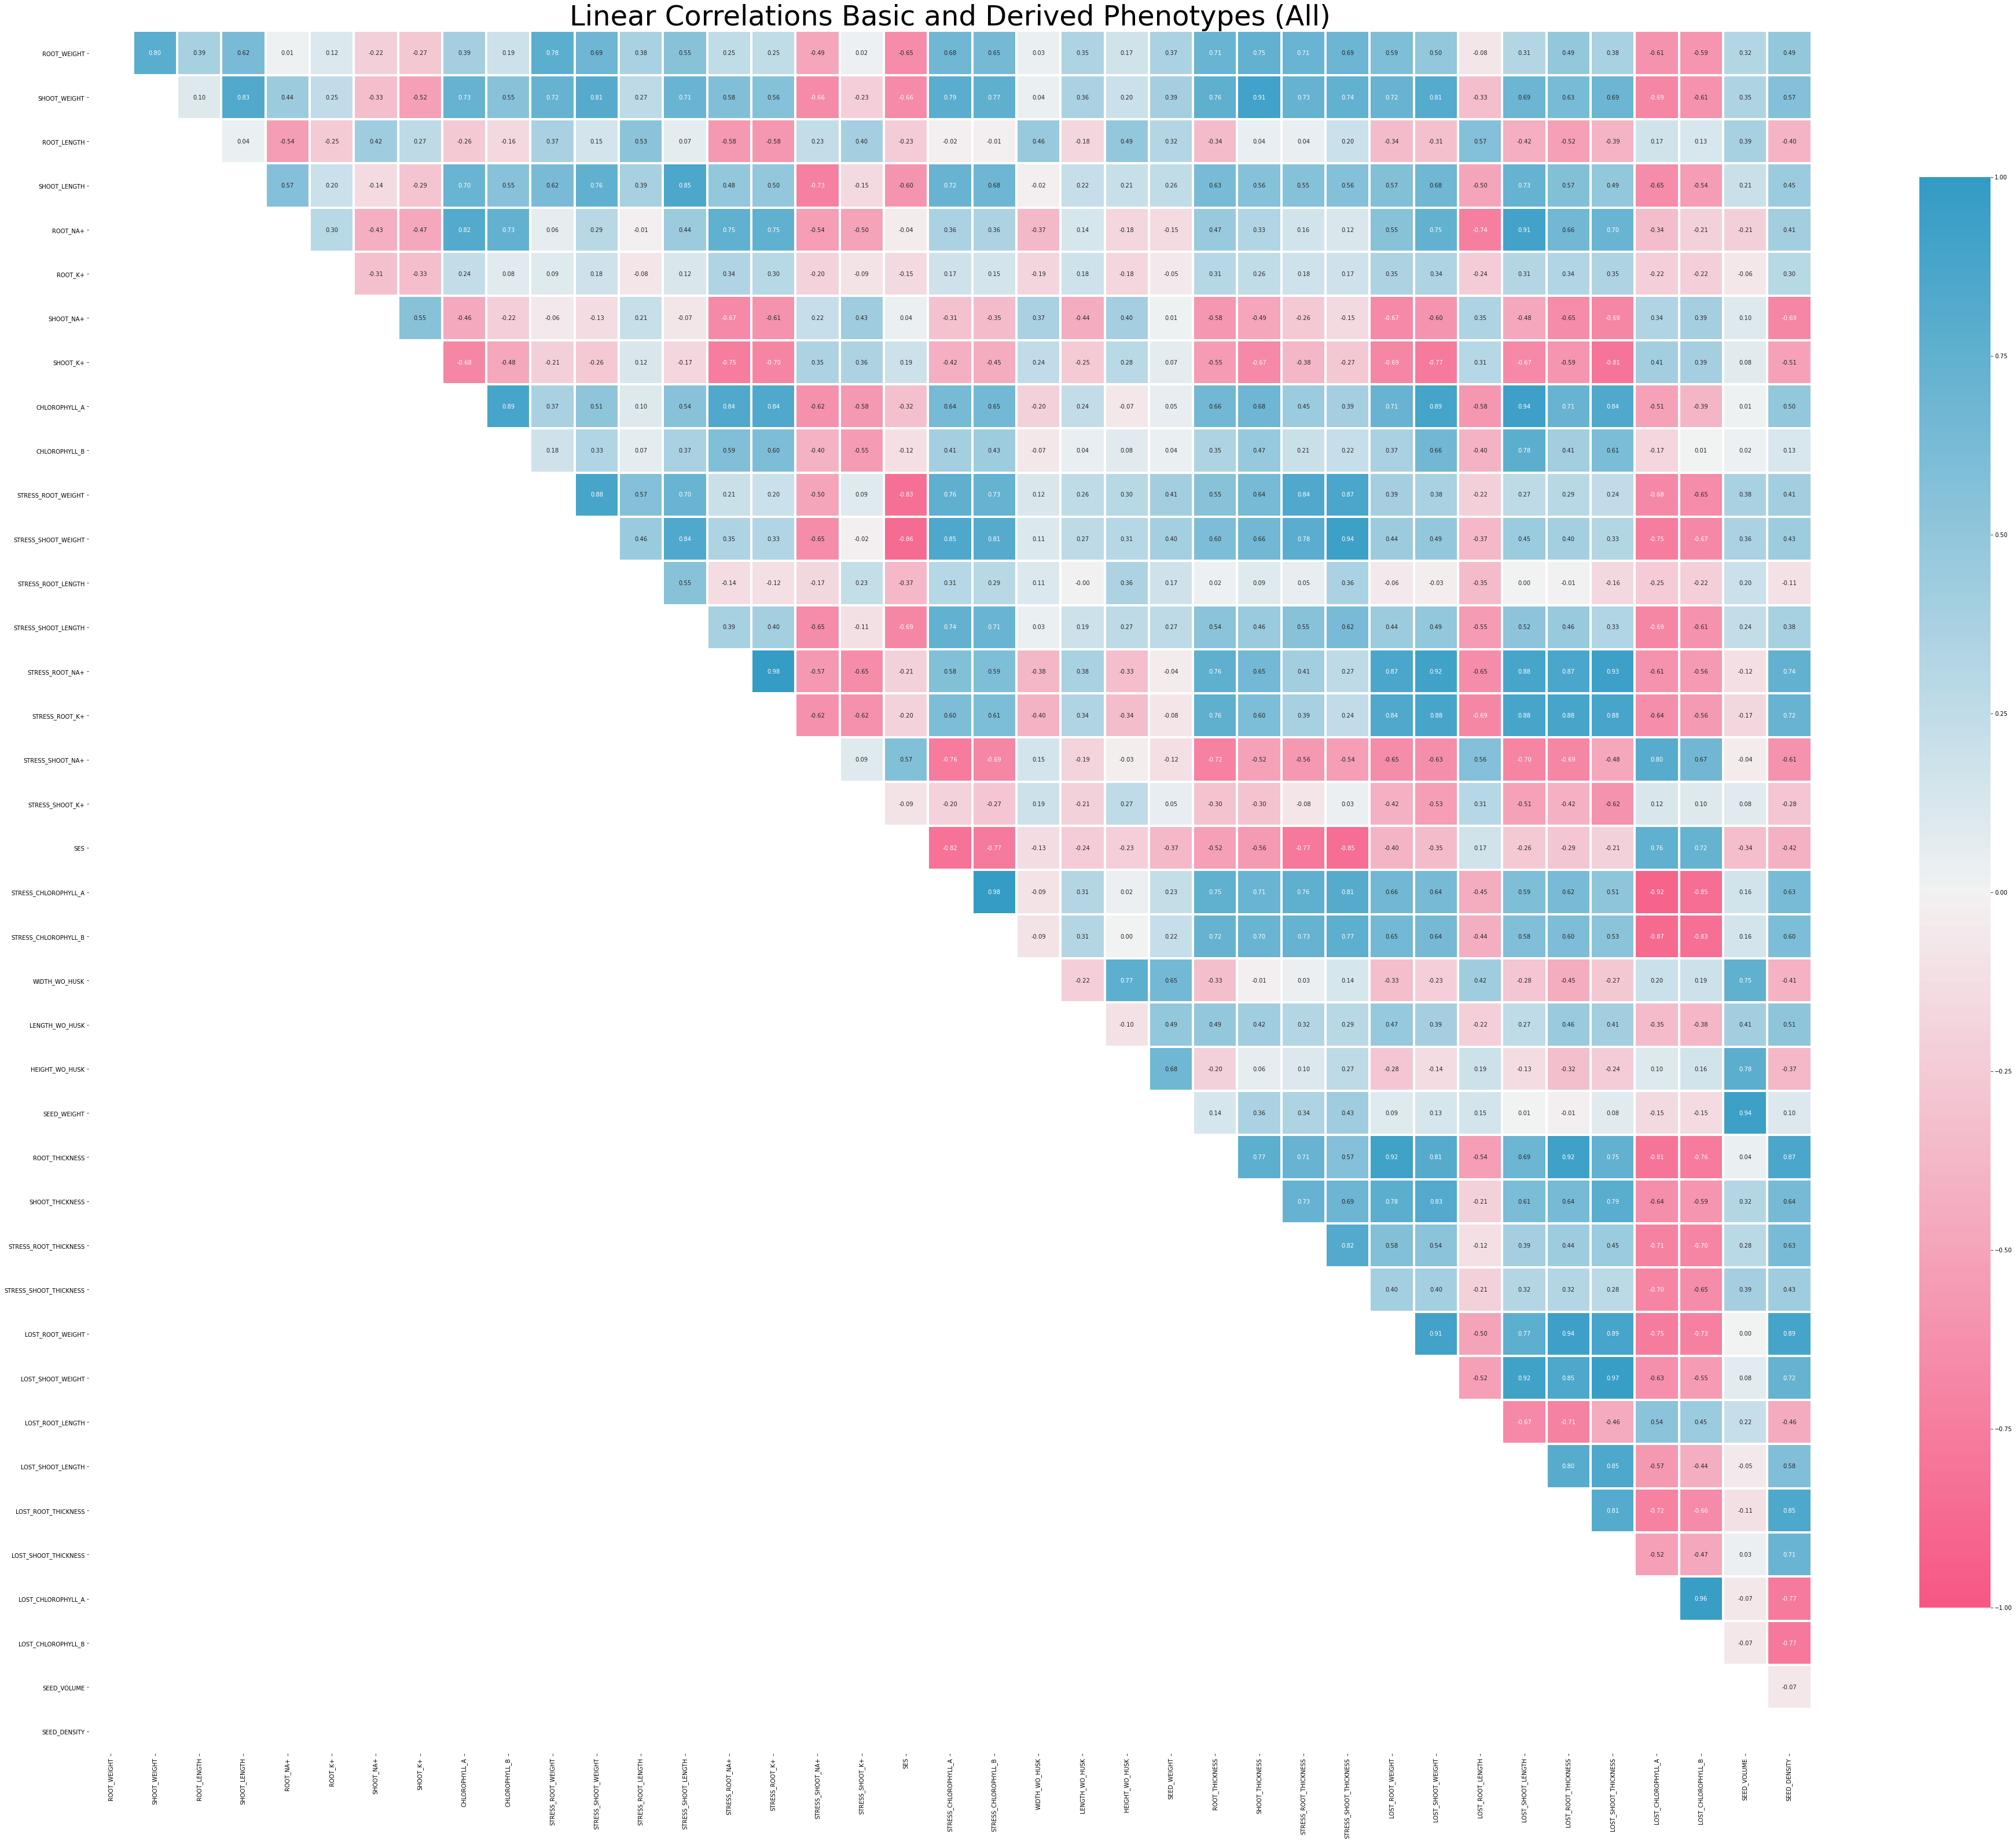

In [68]:
makehm(df3.corr(), df.corr(), 'Linear Correlations Basic and Derived Phenotypes (All)', 4.5, 12)

In [73]:
df.columns == df3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [74]:
df3.corrwith(df)

Root_weight               0.850134
Shoot_weight              0.813717
Root_length               0.833629
Shoot_length              0.830163
Root_Na+                  0.314845
Root_K+                   0.921779
Shoot_Na+                 0.513014
Shoot_K+                  0.448717
Chlorophyll_A             0.444848
Chlorophyll_B             0.566743
Stress_Root_weight        0.814739
Stress_Shoot_weight       0.878085
Stress_Root_length        0.794221
Stress_Shoot_length       0.885326
Stress_Root_Na+           0.302977
Stress_Root_K+            0.426434
Stress_Shoot_Na+          0.656587
Stress_Shoot_K+           0.624932
SES                       0.829150
Stress_Chlorophyll_A      0.804486
Stress_Chlorophyll_B      0.837352
Width_WO_husk             0.998249
Length_WO_husk            0.999161
Height_WO_husk            0.975458
Seed_Weight               0.999970
Root_thickness            0.712426
Shoot_thickness           0.711876
Stress_Root_thickness     0.784127
Stress_Shoot_thickne

In [13]:
df6[df6.columns[j]]

0       30.666667
1      100.000000
2       72.000000
3       64.000000
4       69.666667
          ...    
171     82.666667
172     86.000000
173     66.000000
174    109.333333
175     77.333333
Name: Stress Root weight (SRW), Length: 176, dtype: float64

In [57]:
df5 = df.iloc[:,1:]
df6 = df3.iloc[:,1:]
coeffmat = np.zeros((df5.shape[1], df6.shape[1]))
pvalmat = np.zeros((df5.shape[1], df6.shape[1]))

for i in range(df5.shape[1]):    
    for j in range(df6.shape[1]):
        tdf7 = pd.concat([df5[df5.columns[i]], df6[df6.columns[j]]], axis = 1).dropna()
        corrtest = pearsonr(tdf7.iloc[:,0], tdf7.iloc[:,1])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfcoeff = pd.DataFrame(coeffmat, columns=df.columns[1:], index=df3.columns[1:])
dfpvals = pd.DataFrame(pvalmat, columns=df.columns[1:], index=df3.columns[1:])

In [58]:
dfpvals.to_clipboard()

In [62]:
df5 = df.iloc[:,1:]
coeffmat = np.zeros((df5.shape[1], df5.shape[1]))
pvalmat = np.zeros((df5.shape[1], df5.shape[1]))

for i in range(df5.shape[1]):    
    for j in range(df5.shape[1]):
        tdf7 = pd.concat([df5[df5.columns[i]], df5[df5.columns[j]]], axis = 1).dropna()
        corrtest = pearsonr(tdf7.iloc[:,0], tdf7.iloc[:,1])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfcoeff = pd.DataFrame(coeffmat, columns=df5.columns, index=df5.columns)
dfpvals = pd.DataFrame(pvalmat, columns=df5.columns, index=df5.columns)

In [63]:
dfpvals.to_clipboard()

In [60]:
df5 = df3.iloc[:,1:]
coeffmat = np.zeros((df5.shape[1], df5.shape[1]))
pvalmat = np.zeros((df5.shape[1], df5.shape[1]))

for i in range(df5.shape[1]):    
    for j in range(df5.shape[1]):
        tdf7 = pd.concat([df5[df5.columns[i]], df5[df5.columns[j]]], axis = 1).dropna()
        corrtest = pearsonr(tdf7.iloc[:,0], tdf7.iloc[:,1])  

        coeffmat[i,j] = corrtest[0]
        pvalmat[i,j] = corrtest[1]

dfcoeff = pd.DataFrame(coeffmat, columns=df5.columns, index=df5.columns)
dfpvals = pd.DataFrame(pvalmat, columns=df5.columns, index=df5.columns)

In [61]:
dfpvals.to_clipboard()

In [1124]:
reprg = { 'qCDP1' : 'LOC_Os01g66140',
        'qCDP2' : 'LOC_Os02g14980',
        'qCDP3' : 'LOC_Os03g03530',
        'qCDP4' : 'LOC_Os03g29360',
        'qCDP5' : 'LOC_Os05g08810',
        'qCDP6' : 'LOC_Os05g30420',
        'qCDP7' : 'LOC_Os06g35574',
        'qCDP8' : 'LOC_Os07g36630',
        'qCDP9' : 'LOC_Os08g43200',
        'qCDP10' : 'LOC_Os09g15420',
        'qCDP11' : 'LOC_Os09g19160',
        'qCDP12' : 'LOC_Os09g34340',
        'qCDP13' : 'LOC_Os10g34930',
        'qCDP14' : 'LOC_Os11g26790',
        'qCDP15' : 'LOC_Os12g06100',
        'qCDP16' : 'LOC_Os12g28100',
        'qCDP17' : 'LOC_Os12g41650'}

In [1125]:
df = pd.read_excel('../../Data/final_rice_v7_expression_matrix_48columns.xls')

In [1126]:
df = df[~df.iloc[:,1:].duplicated()]

In [1127]:
df = df.applymap(lambda x: 0 if str(x) == 'no' else x).applymap(lambda x: 1 if str(x) == 'yes' else x)

In [1128]:
df = df[df.iloc[:,1:17].sum(axis = 1) > 1]

In [1129]:
df2 = pd.read_table('../../Data/MSU7/all.locus_brief_info.7.0')[['locus','start', 'stop', 'annotation']]

In [1130]:
s = df2.sort_values('start').drop_duplicates('locus')[['locus', 'start']]
e = df2.sort_values('stop', ascending = False).drop_duplicates('locus')[['locus', 'stop', 'annotation']]
df2 = pd.merge(s,e)

In [977]:
df[df.duplicated('Locus_id', keep = False)] #drop 2,4,5

Locus_id  Leaves-20 days  Post-emergence inflorescence  \
8267   LOC_Os10g22310         1.85530                        0.0000   
8268   LOC_Os10g22310         1.85530                        0.0000   
23300  LOC_Os02g55670         2.68955                       15.6042   
23364  LOC_Os02g55670         2.68955                       15.6042   
39716  LOC_Os06g07923         2.48153                       11.3470   
39717  LOC_Os06g07923         2.48153                       11.3470   

       Pre-emergence inflorescence    Anther    Pistil  Seed-5 DAP  \
8267                        0.0000  0.000000    0.0000     0.00000   
8268                        0.0000  0.000000    0.0000     0.00000   
23300                      11.8535  0.703374  162.3250     9.25659   
23364                      11.8535  0.703374  162.3250     9.25659   
39716                      17.4112  3.423420   19.0391    10.58670   
39717                      17.4112  3.423420   19.0391    10.58670   

       Embryo- 25 DAP  Endosperm- 25 DAP  Seed- 10 DAP  ...  \
8267          0.00000            0.00000       0.00000  ...   
8268          0.00000            0.00000       0.00000  ...   
23300         1.65350            1.15347       2.37163  ...   
23364         1.65350            1.15347       2.37163  ...   
39716         8.23389            1.01986       1.14780  ...   
39717         8.23389            1.01986       1.14780  ...   

       Rice leaf-Water weevil damaged-24h  HighMilling-Developing seeds-6days  \
8267                                    0                                   0   
8268                                    0                                   0   
23300                                   0                                   0   
23364                                   0                                   0   
39716                                   0                                   0   
39717                                   0                                   0   

       HighTaste-Developing seeds-6days  LowMilling-Developing seeds-6days  \
8267                                  0                                  0   
8268                                  0                                  0   
23300                                 0                                  0   
23364                                 0                                  0   
39716                                 0                                  0   
39717                                 0                                  0   

       Control-Developing seeds-6days  LowTaste-Developing seeds-6days  \
8267                                0                                0   
8268                                0                                0   
23300                               0                                0   
23364                               0                                0   
39716                               0                                0   
39717                               0                                0   

       Mature Sigma and Ovary  60days-Mature roots  Mock treatment-24hr  \
8267                        0                    1                    0   
8268                        0                    1                    0   
23300                       0                    0                    0   
23364                       0                    0                    0   
39716                       0                    0                    0   
39717                       0                    0                    0   

       M.oryzae-R-24h  
8267                0  
8268                0  
23300               0  
23364               0  
39716               0  
39717               0  

[6 rows x 49 columns]

In [1133]:
df2 = pd.merge(df, df2, left_on = 'Locus_id', right_on = 'locus', how = 'left')

In [1131]:
df = df.drop(index = [8268, 23364, 39716])

In [1132]:
df

Locus_id  Leaves-20 days  Post-emergence inflorescence  \
0             LOC_Os01g01019        0.000000                       1.19859   
1             LOC_Os01g01060       27.325500                      95.78270   
2             LOC_Os01g01030        0.518297                       6.17424   
3             LOC_Os01g01110        0.000000                       0.00000   
5             LOC_Os01g01115        0.000000                       1.08818   
...                      ...             ...                           ...   
55981  ChrUn.fgenesh.gene.86        0.604088                       2.47076   
55982  ChrUn.fgenesh.gene.92        0.000000                       0.00000   
55984  ChrUn.fgenesh.gene.94       66.319300                       0.00000   
55986  ChrUn.fgenesh.gene.96       31.378200                     219.62400   
55988  ChrUn.fgenesh.gene.85        5.552580                      11.94320   

       Pre-emergence inflorescence     Anther     Pistil  Seed-5 DAP  \
0                         0.787847   0.322353    1.00938    0.721408   
1                       182.152000  36.080000  160.98700  168.422000   
2                        14.864400   0.899446   13.49500   11.136300   
3                         0.669189   0.000000    0.00000    0.000000   
5                         1.649930   0.000000    0.85732    0.373917   
...                            ...        ...        ...         ...   
55981                     0.321147   0.094730    0.12102    0.100859   
55982                     0.000000   0.000000    0.00000    0.000000   
55984                     0.000000   0.000000    0.00000    0.000000   
55986                    36.733600   7.065210   19.29940   22.832700   
55988                    25.805100   9.055110   19.83970    9.706260   

       Embryo- 25 DAP  Endosperm- 25 DAP  Seed- 10 DAP  ...  \
0            1.938840           0.000000      0.000000  ...   
1           86.337900          15.269300     55.525400  ...   
2            6.577680           0.459406      2.377440  ...   
3            0.000000           0.000000      0.000000  ...   
5            0.810011           0.000000      0.219613  ...   
...               ...                ...           ...  ...   
55981        0.000000           0.000000      0.000000  ...   
55982        0.000000           0.000000      0.000000  ...   
55984        0.000000           0.000000      0.000000  ...   
55986       23.654000           1.760790      4.470300  ...   
55988       17.287100           1.675630      4.849440  ...   

       Rice leaf-Water weevil damaged-24h  HighMilling-Developing seeds-6days  \
0                                       0                                   0   
1                                       0                                   0   
2                                       0                                   0   
3                                       0                                   0   
5                                       0                                   0   
...                                   ...                                 ...   
55981                                   0                                   0   
55982                                   0                                   0   
55984                                   0                                   0   
55986                                   0                                   0   
55988                                   0                                   0   

       HighTaste-Developing seeds-6days  LowMilling-Developing seeds-6days  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                                  0   
5                                     0                                  0   
...                 

In [1134]:
df2

Locus_id  Leaves-20 days  Post-emergence inflorescence  \
0             LOC_Os01g01019        0.000000                       1.19859   
1             LOC_Os01g01060       27.325500                      95.78270   
2             LOC_Os01g01030        0.518297                       6.17424   
3             LOC_Os01g01110        0.000000                       0.00000   
4             LOC_Os01g01115        0.000000                       1.08818   
...                      ...             ...                           ...   
31531  ChrUn.fgenesh.gene.86        0.604088                       2.47076   
31532  ChrUn.fgenesh.gene.92        0.000000                       0.00000   
31533  ChrUn.fgenesh.gene.94       66.319300                       0.00000   
31534  ChrUn.fgenesh.gene.96       31.378200                     219.62400   
31535  ChrUn.fgenesh.gene.85        5.552580                      11.94320   

       Pre-emergence inflorescence     Anther     Pistil  Seed-5 DAP  \
0                         0.787847   0.322353    1.00938    0.721408   
1                       182.152000  36.080000  160.98700  168.422000   
2                        14.864400   0.899446   13.49500   11.136300   
3                         0.669189   0.000000    0.00000    0.000000   
4                         1.649930   0.000000    0.85732    0.373917   
...                            ...        ...        ...         ...   
31531                     0.321147   0.094730    0.12102    0.100859   
31532                     0.000000   0.000000    0.00000    0.000000   
31533                     0.000000   0.000000    0.00000    0.000000   
31534                    36.733600   7.065210   19.29940   22.832700   
31535                    25.805100   9.055110   19.83970    9.706260   

       Embryo- 25 DAP  Endosperm- 25 DAP  Seed- 10 DAP  ...  \
0            1.938840           0.000000      0.000000  ...   
1           86.337900          15.269300     55.525400  ...   
2            6.577680           0.459406      2.377440  ...   
3            0.000000           0.000000      0.000000  ...   
4            0.810011           0.000000      0.219613  ...   
...               ...                ...           ...  ...   
31531        0.000000           0.000000      0.000000  ...   
31532        0.000000           0.000000      0.000000  ...   
31533        0.000000           0.000000      0.000000  ...   
31534       23.654000           1.760790      4.470300  ...   
31535       17.287100           1.675630      4.849440  ...   

       Control-Developing seeds-6days  LowTaste-Developing seeds-6days  \
0                                   0                                0   
1                                   0                                0   
2                                   0                                0   
3                                   0                                0   
4                                   0                                0   
...                               ...                              ...   
31531                               0                                0   
31532                               0                                0   
31533                               0                                0   
31534                               0                                0   
31535                               0                                0   

       Mature Sigma and Ovary  60days-Mature roots  Mock treatment-24hr  \
0                           0                    0                    0   
1                           1                    0                    0   
2                           0                    1                    0   
3                           0                    0                    0   
4                           0                    0                    0   
...                       ...                  ...                  ...   
31531                       0                  

In [1092]:
pd.merge(dfi, df2)

Locus_id     QTL  Leaves-20 days  Post-emergence inflorescence  \
0   LOC_Os01g66140   qCDP1        4.881700                      4.449100   
1   LOC_Os02g14980   qCDP2        5.142000                      7.979110   
2   LOC_Os03g03530   qCDP3        6.984620                     13.289700   
3   LOC_Os03g29360   qCDP4        2.340400                      3.529990   
4   LOC_Os05g08810   qCDP5       12.862100                     10.566100   
5   LOC_Os05g30420   qCDP6        5.388580                     14.593800   
6   LOC_Os06g35574   qCDP7        0.000000                      0.000000   
7   LOC_Os07g36630   qCDP8        0.175674                      1.969750   
8   LOC_Os08g43200   qCDP9        0.000000                      0.000000   
9   LOC_Os09g15420  qCDP10        1.690540                      4.679820   
10  LOC_Os09g19160  qCDP11        0.756693                      0.703209   
11  LOC_Os09g34340  qCDP12       45.563600                     15.580000   
12  LOC_Os10g34930  qCDP13       51.373800                      0.660601   
13  LOC_Os11g26790  qCDP14       41.581400                      1.377690   
14  LOC_Os12g06100  qCDP15       13.269600                     17.910400   
15  LOC_Os12g28100  qCDP16        1.369780                      4.493380   
16  LOC_Os12g41650  qCDP17       37.903900                      3.356410   

    Pre-emergence inflorescence     Anther     Pistil  Seed-5 DAP  \
0                      7.582600   4.115040   5.152060     4.48587   
1                      3.356230   3.335700   8.564560     2.32986   
2                      9.306260  18.327000   6.766580     5.39904   
3                      1.517470   3.667020   5.470120     5.60154   
4                      9.111480   7.985200  10.509400     6.04585   
5                     14.027900   1.852830  26.820300    22.12340   
6                      0.000000   0.000000   1.523890     1.30794   
7                      1.997310   1.246550   1.125760     1.50417   
8                      0.000000   0.000000   0.000000     0.00000   
9                      6.264970  24.989900   6.537330     4.42463   
10                     0.468605   0.853952   0.563765     0.00000   
11                    14.371600  41.410600  86.362500    27.38010   
12                     0.000000   2.248170   0.000000     2.85665   
13                     0.000000   0.688267  13.338400    24.65060   
14                     9.484790   7.938200  23.472000    11.06520   
15                     5.102190  17.803900   6.514650     2.40674   
16                     0.651496   2.736470   5.574120     2.57578   

    Embryo- 25 DAP  Endosperm- 25 DAP  ...  Control-Developing seeds-6days  \
0         9.390520           0.880779  ...                               0   
1        32.441300           2.011990  ...                               0   
2        11.126300           1.518280  ...                               0   
3         0.000000           0.000000  ...                               0   
4         9.701790           5.282460  ...                               0   
5         5.720580           0.746062  ...                               0   
6         0.000000           0.000000  ...                               0   
7         2.292910           0.000000  ...                               0   
8         0.000000           0.000000  ...                               0   
9         2.205660          14.906100  ...                               0   
10        0.773633           0.000000  ...                               0   
11       48.197400           1.237890  ...                               0   
12        0.000000           0.000000  ...                               0   
13     1848.800000         330.172000  ...                               0   
14        9.443690           1.596910  ...                               0   
15        9.236340           1.013440  ...                               0   
16        0.825528           0.000000  ...                              

In [1093]:
dfi = pd.DataFrame(reprg, index=['Locus_id']).transpose()
dfi['QTL'] = dfi.index
df3 = pd.DataFrame()
for q,c,s,e in pd.merge(dfi, df2)[['QTL', 'Locus_id', 'start', 'stop']].itertuples(index = False):
    tdf = df2[df2['Locus_id'].apply(lambda x: x[6:8]) == c[6:8]]
    tdf = tdf[((tdf['start'] > (s - 100000)) & (tdf['stop'] < (e + 100000)))]
    tdf['QTL'] = q
    df3 = pd.concat([df3,tdf], axis = 0).reset_index(drop = True)

In [1094]:
df3.to_clipboard()

In [1135]:
df3

QTL        Locus_id  \
0     qCDP1  LOC_Os01g66040   
317   qCDP1  LOC_Os01g66050   
318   qCDP1  LOC_Os01g66000   
319   qCDP1  LOC_Os01g65920   
316   qCDP1  LOC_Os01g66350   
..      ...             ...   
309  qCDP17  LOC_Os12g41490   
310  qCDP17  LOC_Os12g41500   
311  qCDP17  LOC_Os12g41720   
312  qCDP17  LOC_Os12g41715   
375  qCDP17  LOC_Os12g41380   

                                            annotation  Seed-5 DAP  \
0                 receptor kinase, putative, expressed     0.00000   
317  wound-responsive family protein, putative, exp...    15.79510   
318  NADH dehydrogenase I subunit N, putative, expr...     2.42114   
319    F-box/LRR-repeat protein 2, putative, expressed    46.13460   
316  DUF647 domain containing protein, putative, ex...    56.71890   
..                                                 ...         ...   
309  cysteine-rich receptor-like protein kinase 8 p...     1.81567   
310  rhodanese-like domain containing protein, puta...    49.34270   
311                 PLA IIIA/PLP7, putative, expressed     7.43660   
312  DEAD-box ATP-dependent RNA helicase, putative,...    27.99190   
375  ulp1 protease family protein, putative, expressed     4.54028   

     Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
0        0.000000        0.000000           0.000000   
317      7.500500       16.227000           5.797790   
318      0.000000        0.000000           0.000000   
319     32.641100       66.089700          70.666000   
316     10.245900       44.886400           5.688130   
..            ...             ...                ...   
309      0.297886        0.000288           0.202435   
310     16.405100       39.912200           6.314700   
311      1.039410        6.224160           1.015270   
312      3.318000       45.816400           2.206400   
375      2.331410        3.780640           2.057670   

     Endosperm- 25 DAP (replicate)     Anther      Pistil  ...  \
0                         0.000000   0.000000    0.949651  ...   
317                       5.667740   6.794850   24.808400  ...   
318                       0.078056   0.082695    5.396320  ...   
319                      71.651800  91.166500  113.964000  ...   
316                       5.465030  25.883400   52.766000  ...   
..                             ...        ...         ...  ...   
309                       0.149882   0.278273    0.440457  ...   
310                       5.758300   7.804370   28.957600  ...   
311                       0.834124   0.630419    3.601430  ...   
312                       2.635360   8.166130   70.428900  ...   
375                       2.207670   5.128350    8.426190  ...   

     M.oryzae infected-Susceptible-24h  M.oryzae infected-Susceptible-96h  \
0                                    0                                  0   
317                                  0                                  0   
318                                  0                                  0   
319                                  0                                  0   
316                                  0                                  0   
..                                 ...                                ...   
309                                  0                                  0   
310                                  0                                  0   
311                                  0                                  0   
312                                  0                                  0   
375                                  1                                  0   

     Rice leaf-beet armyworm damaged-24h  Rice leaf- Mechanical damaged-24h  \
0                                      0                                  0   
317                                    0                                  0   
318                                    0                                  0   
319                                    0                                  0   
316     

In [1095]:
df4 = df3[['QTL', 'Locus_id', 'annotation', 'Seed-5 DAP', 'Seed- 10 DAP',
       'Embryo- 25 DAP', 'Endosperm- 25 DAP', 'Endosperm- 25 DAP (replicate)',
       'Anther', 'Pistil', 'Pre-emergence inflorescence',
       'Post-emergence inflorescence', 'Leaves-20 days',
       'Leaves- 20 days (replicate)', 'Shoots',
       'Seedling four-leaf stage F1 93-11/Nipp',
       'Seedling four-leaf stage F1 Nipp/93-11',
       'Seedling four-leaf stage 93-11', 'Seedling four-leaf stage ',
       'Germinating seed-3 days', 'Stem-60 days', 'Callus-35 days',
       '60days-Mature roots', 'Mature leaves-60 days', 'Mature pollen',
       'Immature panicle-90 days', 'Mature Sigma and Ovary',
       'Salt Stress-Leaves-2wks', 'Salt Stress-Roots-2wks',
       'Drought Stress-Leaves-2wks', 'Drought Stress-Roots-2wks',
       'Cold Stress-Leaves-2wks', 'Cold Stress-Roots-2wks',
       'M.oryzae infected-Resistant-6h', 'M.oryzae infected-Resistant-12h',
       'M.oryzae-R-24h', 'Mock treatment-24hr', 'Untreated-leaves-2wks',
       'Untreated-Roots-2wks', 'M.oryzae infected-Susceptible-6h',
       'M.oryzae infected-Susceptible-12h',
       'M.oryzae infected-Susceptible-24h',
       'M.oryzae infected-Susceptible-96h',
       'Rice leaf-beet armyworm damaged-24h',
       'Rice leaf- Mechanical damaged-24h',
       'Rice leaf-Water weevil damaged-24h',
       'HighMilling-Developing seeds-6days',
       'HighTaste-Developing seeds-6days', 'LowMilling-Developing seeds-6days',
       'Control-Developing seeds-6days', 'LowTaste-Developing seeds-6days']]

In [1060]:
df4.to_csv('../Figures and tables/Expression Table.csv', index = False)

In [1096]:
t = []
for i,r in df4.iterrows():
    if 'transposon' in r['annotation'].lower():
        pass
    else:
        t.append(i)
df4 = df4.loc[t,:]
df4 = df4.drop_duplicates('Locus_id').reset_index(drop = True)

In [1064]:
df4.to_csv('../Figures and tables/Expression Table no transposons.csv', index = False)

In [1067]:
locs = 'LOC_Os01g66120, LOC_Os01g66350, LOC_Os01g66050, LOC_Os01g66000, LOC_Os01g65920, LOC_Os02g14980, LOC_Os02g14860, LOC_Os02g14900, LOC_Os02g14929, LOC_Os03g03590, LOC_Os03g03540, LOC_Os03g03510, LOC_Os03g03460, LOC_Os03g03450, LOC_Os03g03700, LOC_Os03g03720, LOC_Os03g03810, LOC_Os03g04060, LOC_Os03g04070, LOC_Os05g08730, LOC_Os05g08620, LOC_Os05g08770, LOC_Os05g08770, LOC_Os05g08920, LOC_Os05g30480, LOC_Os05g30430, LOC_Os05g30320, LOC_Os06g35530, LOC_Os06g35574, LOC_Os06g35520, LOC_Os06g35410, LOC_Os07g36600, LOC_Os07g36740, LOC_Os07g36750, LOC_Os07g36700, LOC_Os07g36690, LOC_Os07g37030, LOC_Os07g37610, LOC_Os07g37210, LOC_Os07g37240, LOC_Os07g37580, LOC_Os07g37640, LOC_Os08g43200, LOC_Os08g43130, LOC_Os08g43270, LOC_Os08g43370, LOC_Os08g43410, LOC_Os09g15420, LOC_Os09g15365, LOC_Os09g15500, LOC_Os09g15520, LOC_Os09g18470, LOC_Os09g18450, LOC_Os09g34340, LOC_Os09g34900, LOC_Os09g35010, LOC_Os09g34200, LOC_Os09g34160, LOC_Os09g34150, LOC_Os10g34930, LOC_Os10g35050, LOC_Os10g35110, LOC_Os10g35180, LOC_Os10g34680, LOC_Os11g26790, LOC_Os12g05990, LOC_Os12g06110, LOC_Os12g06330, LOC_Os12g28260, LOC_Os12g28100, LOC_Os12g28250, LOC_Os12g41650, LOC_Os12g41680, LOC_Os12g41700, LOC_Os12g41380'.split(', ')

In [1073]:
t = []
for l in locs:
    if l not in df4['Locus_id'].to_list():
        t.append(l)

In [1076]:
t

['LOC_Os01g66350',
 'LOC_Os01g66000',
 'LOC_Os01g65920',
 'LOC_Os03g03700',
 'LOC_Os03g03720',
 'LOC_Os03g03810',
 'LOC_Os03g04060',
 'LOC_Os03g04070',
 'LOC_Os05g08620',
 'LOC_Os06g35410',
 'LOC_Os07g36750',
 'LOC_Os07g37030',
 'LOC_Os07g37610',
 'LOC_Os07g37210',
 'LOC_Os07g37240',
 'LOC_Os07g37580',
 'LOC_Os07g37640',
 'LOC_Os08g43410',
 'LOC_Os09g15365',
 'LOC_Os09g18470',
 'LOC_Os09g18450',
 'LOC_Os09g35010',
 'LOC_Os09g34160',
 'LOC_Os09g34150',
 'LOC_Os10g35180',
 'LOC_Os10g34680',
 'LOC_Os12g06110',
 'LOC_Os12g06330',
 'LOC_Os12g28260',
 'LOC_Os12g41380']

In [ ]:
#df4 =  pd.concat([df3[(df3['QTL'] == 'qCDP1') | (df3['QTL'] == 'qCDP15') | (df3['QTL'] == 'qCDP17')],
        df3[(df3['QTL'] == 'qCDP2') | (df3['QTL'] == 'qCDP4') | (df3['QTL'] == 'qCDP5') | (df3['QTL'] == 'qCDP14')],
                 df3[(df3['QTL'] == 'qCDP3') | (df3['QTL'] == 'qCDP6') | (df3['QTL'] == 'qCDP7') | (df3['QTL'] == 'qCDP8') |
                    (df3['QTL'] == 'qCDP9') | (df3['QTL'] == 'qCDP10') | (df3['QTL'] == 'qCDP11') | (df3['QTL'] == 'qCDP12') |
                    (df3['QTL'] == 'qCDP13') | (df3['QTL'] == 'qCDP16')]
                 ], axis = 0)


In [1097]:
qdf = pd.read_excel('../Figures and tables/S2 Table Identified QTLs.xlsx')

In [1059]:
df4

QTL        Locus_id  \
0     qCDP1  LOC_Os01g66040   
1     qCDP1  LOC_Os01g66060   
2     qCDP1  LOC_Os01g66050   
3     qCDP1  LOC_Os01g66100   
4     qCDP1  LOC_Os01g66020   
..      ...             ...   
320  qCDP17  LOC_Os12g41720   
321  qCDP17  LOC_Os12g41750   
322  qCDP17  LOC_Os12g41715   
323  qCDP17  LOC_Os12g41650   
324  qCDP17  LOC_Os12g41710   

                                            annotation  Seed-5 DAP  \
0                 receptor kinase, putative, expressed    0.000000   
1                                    expressed protein    0.000000   
2    wound-responsive family protein, putative, exp...   15.795100   
3        gibberellin 20 oxidase 2, putative, expressed    6.787130   
4    protein kinase family protein, putative, expre...    0.305826   
..                                                 ...         ...   
320                 PLA IIIA/PLP7, putative, expressed    7.436600   
321  transposon protein, putative, unclassified, ex...    0.000000   
322  DEAD-box ATP-dependent RNA helicase, putative,...   27.991900   
323  helix-loop-helix DNA-binding domain containing...    2.575780   
324  Protein kinase domain containing protein, expr...    1.258660   

     Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
0        0.000000        0.000000           0.000000   
1        0.000000        0.000000           0.000000   
2        7.500500       16.227000           5.797790   
3        0.793680        2.564160           0.000000   
4        0.000000        0.000000           0.000000   
..            ...             ...                ...   
320      1.039410        6.224160           1.015270   
321      0.000000        0.000000           0.000000   
322      3.318000       45.816400           2.206400   
323      0.000000        0.825528           0.000000   
324      0.603768        4.596210           0.529252   

     Endosperm- 25 DAP (replicate)    Anther     Pistil  ...  \
0                         0.000000  0.000000   0.949651  ...   
1                         1.377710  0.000000   0.000000  ...   
2                         5.667740  6.794850  24.808400  ...   
3                         0.000000  1.775430  19.499000  ...   
4                         0.000000  0.277186   1.698780  ...   
..                             ...       ...        ...  ...   
320                       0.834124  0.630419   3.601430  ...   
321                       0.000000  0.266929   0.000000  ...   
322                       2.635360  8.166130  70.428900  ...   
323                       0.000000  2.736470   5.574120  ...   
324                       0.281378  0.221471   0.399949  ...   

     M.oryzae infected-Susceptible-24h  M.oryzae infected-Susceptible-96h  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
..                                 ...                                ...   
320                                  0                                  0   
321                                  0                                  0   
322                                  0                                  0   
323                                  0                                  0   
324                                  0                                  0   

     Rice leaf-beet armyworm damaged-24h  Rice leaf- Mechanical damaged-24h  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                               

In [1068]:
locs

['LOC_Os01g66120',
 'LOC_Os01g66350',
 'LOC_Os01g66050',
 'LOC_Os01g66000',
 'LOC_Os01g65920',
 'LOC_Os02g14980',
 'LOC_Os02g14860',
 'LOC_Os02g14900',
 'LOC_Os02g14929',
 'LOC_Os03g03590',
 'LOC_Os03g03540',
 'LOC_Os03g03510',
 'LOC_Os03g03460',
 'LOC_Os03g03450',
 'LOC_Os03g03700',
 'LOC_Os03g03720',
 'LOC_Os03g03810',
 'LOC_Os03g04060',
 'LOC_Os03g04070',
 'LOC_Os05g08730',
 'LOC_Os05g08620',
 'LOC_Os05g08770',
 'LOC_Os05g08770',
 'LOC_Os05g08920',
 'LOC_Os05g30480',
 'LOC_Os05g30430',
 'LOC_Os05g30320',
 'LOC_Os06g35530',
 'LOC_Os06g35574',
 'LOC_Os06g35520',
 'LOC_Os06g35410',
 'LOC_Os07g36600',
 'LOC_Os07g36740',
 'LOC_Os07g36750',
 'LOC_Os07g36700',
 'LOC_Os07g36690',
 'LOC_Os07g37030',
 'LOC_Os07g37610',
 'LOC_Os07g37210',
 'LOC_Os07g37240',
 'LOC_Os07g37580',
 'LOC_Os07g37640',
 'LOC_Os08g43200',
 'LOC_Os08g43130',
 'LOC_Os08g43270',
 'LOC_Os08g43370',
 'LOC_Os08g43410',
 'LOC_Os09g15420',
 'LOC_Os09g15365',
 'LOC_Os09g15500',
 'LOC_Os09g15520',
 'LOC_Os09g18470',
 'LOC_Os09g1

In [1063]:
df4

QTL        Locus_id  \
0     qCDP1  LOC_Os01g66040   
1     qCDP1  LOC_Os01g66060   
2     qCDP1  LOC_Os01g66050   
3     qCDP1  LOC_Os01g66100   
4     qCDP1  LOC_Os01g66020   
..      ...             ...   
310  qCDP17  LOC_Os12g41500   
311  qCDP17  LOC_Os12g41720   
312  qCDP17  LOC_Os12g41715   
313  qCDP17  LOC_Os12g41650   
314  qCDP17  LOC_Os12g41710   

                                            annotation  Seed-5 DAP  \
0                 receptor kinase, putative, expressed    0.000000   
1                                    expressed protein    0.000000   
2    wound-responsive family protein, putative, exp...   15.795100   
3        gibberellin 20 oxidase 2, putative, expressed    6.787130   
4    protein kinase family protein, putative, expre...    0.305826   
..                                                 ...         ...   
310  rhodanese-like domain containing protein, puta...   49.342700   
311                 PLA IIIA/PLP7, putative, expressed    7.436600   
312  DEAD-box ATP-dependent RNA helicase, putative,...   27.991900   
313  helix-loop-helix DNA-binding domain containing...    2.575780   
314  Protein kinase domain containing protein, expr...    1.258660   

     Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
0        0.000000        0.000000           0.000000   
1        0.000000        0.000000           0.000000   
2        7.500500       16.227000           5.797790   
3        0.793680        2.564160           0.000000   
4        0.000000        0.000000           0.000000   
..            ...             ...                ...   
310     16.405100       39.912200           6.314700   
311      1.039410        6.224160           1.015270   
312      3.318000       45.816400           2.206400   
313      0.000000        0.825528           0.000000   
314      0.603768        4.596210           0.529252   

     Endosperm- 25 DAP (replicate)    Anther     Pistil  ...  \
0                         0.000000  0.000000   0.949651  ...   
1                         1.377710  0.000000   0.000000  ...   
2                         5.667740  6.794850  24.808400  ...   
3                         0.000000  1.775430  19.499000  ...   
4                         0.000000  0.277186   1.698780  ...   
..                             ...       ...        ...  ...   
310                       5.758300  7.804370  28.957600  ...   
311                       0.834124  0.630419   3.601430  ...   
312                       2.635360  8.166130  70.428900  ...   
313                       0.000000  2.736470   5.574120  ...   
314                       0.281378  0.221471   0.399949  ...   

     M.oryzae infected-Susceptible-24h  M.oryzae infected-Susceptible-96h  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
..                                 ...                                ...   
310                                  0                                  0   
311                                  0                                  0   
312                                  0                                  0   
313                                  0                                  0   
314                                  0                                  0   

     Rice leaf-beet armyworm damaged-24h  Rice leaf- Mechanical damaged-24h  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                               

In [1099]:
t = []
for l,r in qdf.itertuples(index = False):
    for g in r.split(', '):
        t.append((l,g))

qdf = pd.DataFrame(t, columns = qdf.columns)

In [1100]:
qdf = pd.merge(qdf, df2, left_on='Relevant genes', right_on = 'Locus_id')

In [1101]:
qdf = qdf.rename(columns = {'Locus name' : 'QTL'})

In [1102]:
qdf = qdf[df4.columns]

In [1103]:
df4 = pd.concat([df4, qdf], axis = 0).reset_index(drop = True)

In [1104]:
df4[0] = df4['QTL'].apply(lambda x : int(x.split('P')[1]))
df4 = df4.sort_values(0).drop(columns = 0)

In [1105]:
df4 = df4.drop_duplicates('Locus_id')

In [1106]:
df3 = df4.copy()
df4 =  pd.concat([df3[(df3['QTL'] == 'qCDP1') | (df3['QTL'] == 'qCDP15') | (df3['QTL'] == 'qCDP17')],
        df3[(df3['QTL'] == 'qCDP2') | (df3['QTL'] == 'qCDP4') | (df3['QTL'] == 'qCDP5') | (df3['QTL'] == 'qCDP14')],
                 df3[(df3['QTL'] == 'qCDP3') | (df3['QTL'] == 'qCDP6') | (df3['QTL'] == 'qCDP7') | (df3['QTL'] == 'qCDP8') |
                    (df3['QTL'] == 'qCDP9') | (df3['QTL'] == 'qCDP10') | (df3['QTL'] == 'qCDP11') | (df3['QTL'] == 'qCDP12') |
                    (df3['QTL'] == 'qCDP13') | (df3['QTL'] == 'qCDP16')]
                 ], axis = 0)

In [1084]:
df4

QTL        Locus_id  \
0     qCDP1  LOC_Os01g66040   
1     qCDP1  LOC_Os01g66060   
2     qCDP1  LOC_Os01g66050   
3     qCDP1  LOC_Os01g66100   
4     qCDP1  LOC_Os01g66020   
..      ...             ...   
371  qCDP16  LOC_Os12g28250   
372  qCDP17  LOC_Os12g41650   
373  qCDP17  LOC_Os12g41680   
374  qCDP17  LOC_Os12g41700   
375  qCDP17  LOC_Os12g41380   

                                            annotation  Seed-5 DAP  \
0                 receptor kinase, putative, expressed    0.000000   
1                                    expressed protein    0.000000   
2    wound-responsive family protein, putative, exp...   15.795100   
3        gibberellin 20 oxidase 2, putative, expressed    6.787130   
4    protein kinase family protein, putative, expre...    0.305826   
..                                                 ...         ...   
371  disease resistance protein RPM1, putative, exp...    1.523070   
372  helix-loop-helix DNA-binding domain containing...    2.575780   
373    No apical meristem protein, putative, expressed   10.293200   
374  LSD1 zinc finger domain containing protein, ex...   10.282400   
375  ulp1 protease family protein, putative, expressed    4.540280   

     Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
0         0.00000        0.000000            0.00000   
1         0.00000        0.000000            0.00000   
2         7.50050       16.227000            5.79779   
3         0.79368        2.564160            0.00000   
4         0.00000        0.000000            0.00000   
..            ...             ...                ...   
371       0.00000        3.083700            0.00000   
372       0.00000        0.825528            0.00000   
373       4.65604        0.000000            1.50064   
374       1.92166        5.756990            2.87648   
375       2.33141        3.780640            2.05767   

     Endosperm- 25 DAP (replicate)     Anther     Pistil  ...  \
0                          0.00000   0.000000   0.949651  ...   
1                          1.37771   0.000000   0.000000  ...   
2                          5.66774   6.794850  24.808400  ...   
3                          0.00000   1.775430  19.499000  ...   
4                          0.00000   0.277186   1.698780  ...   
..                             ...        ...        ...  ...   
371                        0.00000   0.307096   4.553320  ...   
372                        0.00000   2.736470   5.574120  ...   
373                        1.33939  17.440400   4.703320  ...   
374                        2.40513  58.024600  17.649800  ...   
375                        2.20767   5.128350   8.426190  ...   

     M.oryzae infected-Susceptible-24h  M.oryzae infected-Susceptible-96h  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
..                                 ...                                ...   
371                                  0                                  0   
372                                  0                                  0   
373                                  0                                  0   
374                                  0                                  0   
375                                  1                                  0   

     Rice leaf-beet armyworm damaged-24h  Rice leaf- Mechanical damaged-24h  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                   

In [ ]:
#LOC_Os01g66350, LOC_Os01g66000, LOC_Os01g65920 belong to QCDP17


In [1108]:
df4.iloc[:, :-3].drop_duplicates().to_csv('../Figures and tables/Expression Table rqtls added.csv', index = False)

In [1086]:
df4.drop_duplicates('Locus_id')

QTL        Locus_id  \
0     qCDP1  LOC_Os01g66040   
1     qCDP1  LOC_Os01g66060   
2     qCDP1  LOC_Os01g66050   
3     qCDP1  LOC_Os01g66100   
4     qCDP1  LOC_Os01g66020   
..      ...             ...   
362  qCDP12  LOC_Os09g34150   
366  qCDP13  LOC_Os10g35180   
367  qCDP13  LOC_Os10g34680   
369  qCDP16  LOC_Os12g28260   
375  qCDP17  LOC_Os12g41380   

                                            annotation  Seed-5 DAP  \
0                 receptor kinase, putative, expressed    0.000000   
1                                    expressed protein    0.000000   
2    wound-responsive family protein, putative, exp...   15.795100   
3        gibberellin 20 oxidase 2, putative, expressed    6.787130   
4    protein kinase family protein, putative, expre...    0.305826   
..                                                 ...         ...   
362  NBS-LRR disease resistance protein, putative, ...    2.092990   
366  white-brown complex homolog protein 11, putati...    0.220067   
367  vacuolar protein sorting-associated protein 52...    0.000000   
369  cyclic nucleotide-gated ion channel, putative,...    0.114570   
375  ulp1 protease family protein, putative, expressed    4.540280   

     Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
0    0.000000e+00        0.000000           0.000000   
1    0.000000e+00        0.000000           0.000000   
2    7.500500e+00       16.227000           5.797790   
3    7.936800e-01        2.564160           0.000000   
4    0.000000e+00        0.000000           0.000000   
..            ...             ...                ...   
362  0.000000e+00        3.391630           0.000000   
366  0.000000e+00        6.198160           0.000000   
367  0.000000e+00        0.000000           0.000000   
369  4.150000e-09        0.262632           0.046812   
375  2.331410e+00        3.780640           2.057670   

     Endosperm- 25 DAP (replicate)     Anther     Pistil  ...  \
0                         0.000000   0.000000   0.949651  ...   
1                         1.377710   0.000000   0.000000  ...   
2                         5.667740   6.794850  24.808400  ...   
3                         0.000000   1.775430  19.499000  ...   
4                         0.000000   0.277186   1.698780  ...   
..                             ...        ...        ...  ...   
362                       0.000000   0.238048   5.446530  ...   
366                       0.000000   6.523970  55.425400  ...   
367                       0.000000  12.270700   0.000000  ...   
369                       0.040834  73.401700   0.256276  ...   
375                       2.207670   5.128350   8.426190  ...   

     M.oryzae infected-Susceptible-24h  M.oryzae infected-Susceptible-96h  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
..                                 ...                                ...   
362                                  0                                  0   
366                                  0                                  0   
367                                  0                                  0   
369                                  0                                  0   
375                                  1                                  0   

     Rice leaf-beet armyworm damaged-24h  Rice leaf- Mechanical damaged-24h  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                   

In [457]:
df5 = pd.read_csv('../Figures and tables/Expression Table manual sorted.csv')
df5.index = df5['QTL']
df5 = df5.iloc[:,3:-3].applymap(lambda x: 0 if x == 'no' else x).applymap(lambda x: 1 if x == 'yes' else x)
df5 = df5[(df5.sum(axis = 1) > 1)]

<AxesSubplot:>

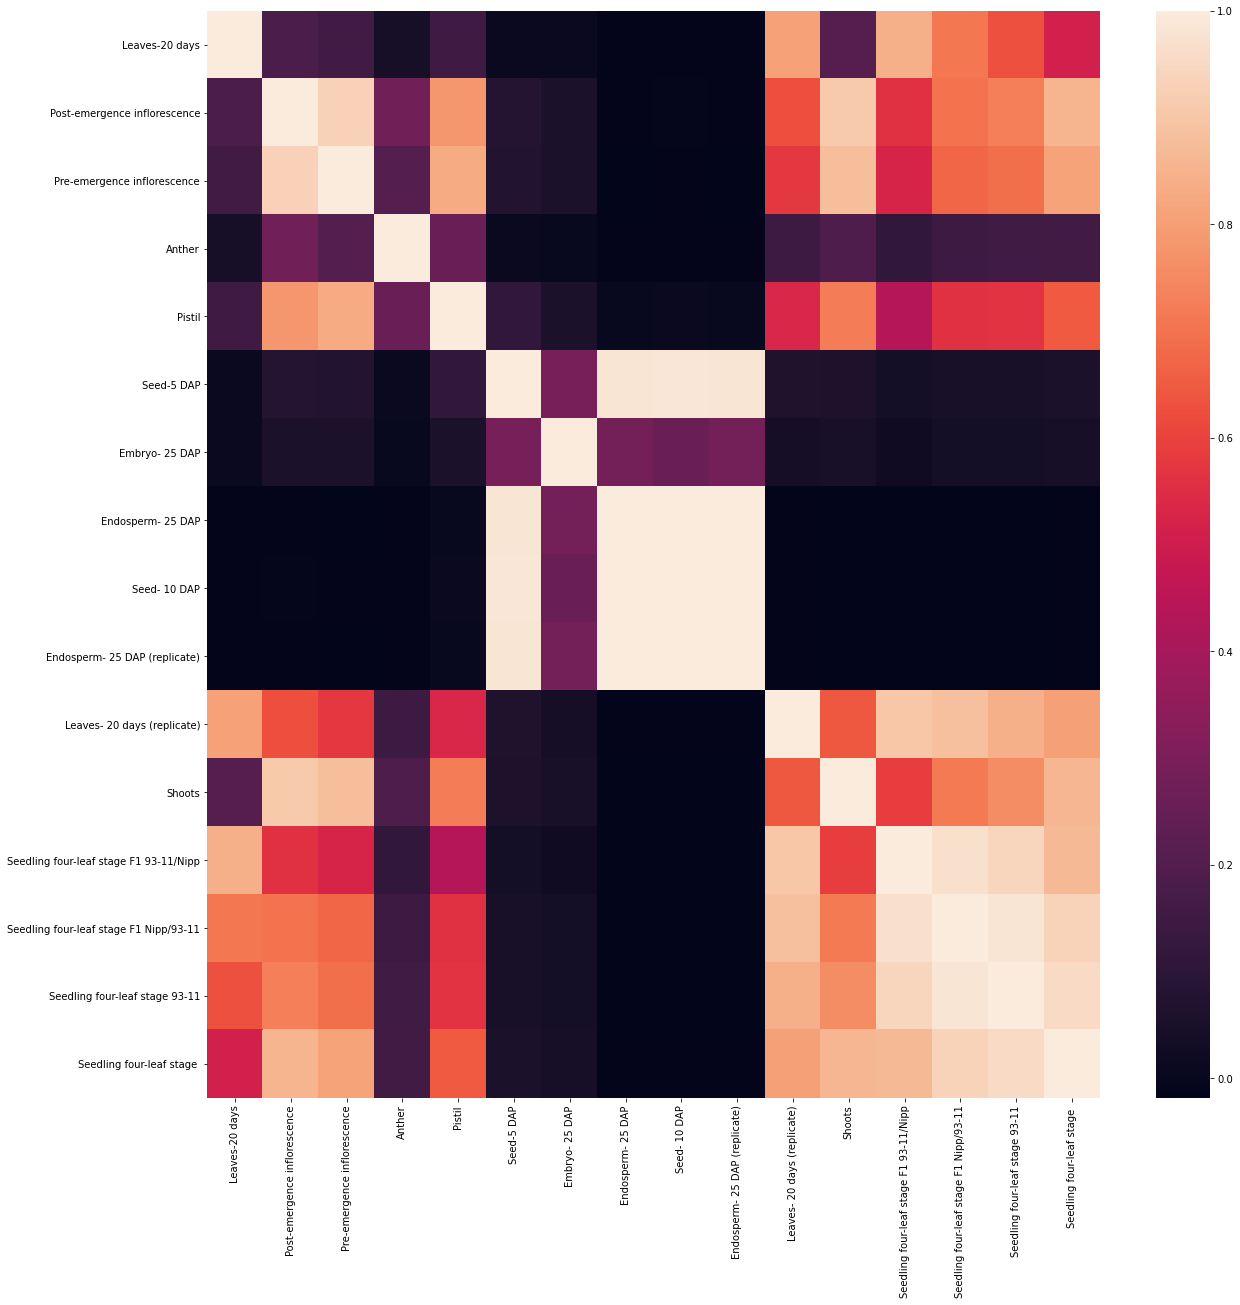

In [149]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df5.iloc[:,:16].corr())

In [1089]:
df4

QTL        Locus_id  \
0     qCDP1  LOC_Os01g66040   
1     qCDP1  LOC_Os01g66060   
2     qCDP1  LOC_Os01g66050   
3     qCDP1  LOC_Os01g66100   
4     qCDP1  LOC_Os01g66020   
..      ...             ...   
361  qCDP12  LOC_Os09g34160   
362  qCDP12  LOC_Os09g34150   
366  qCDP13  LOC_Os10g35180   
367  qCDP13  LOC_Os10g34680   
369  qCDP16  LOC_Os12g28260   

                                            annotation  Seed-5 DAP  \
0                 receptor kinase, putative, expressed    0.000000   
1                                    expressed protein    0.000000   
2    wound-responsive family protein, putative, exp...   15.795100   
3        gibberellin 20 oxidase 2, putative, expressed    6.787130   
4    protein kinase family protein, putative, expre...    0.305826   
..                                                 ...         ...   
361            resistance protein, putative, expressed    0.000000   
362  NBS-LRR disease resistance protein, putative, ...    2.092990   
366  white-brown complex homolog protein 11, putati...    0.220067   
367  vacuolar protein sorting-associated protein 52...    0.000000   
369  cyclic nucleotide-gated ion channel, putative,...    0.114570   

     Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
0    0.000000e+00        0.000000           0.000000   
1    0.000000e+00        0.000000           0.000000   
2    7.500500e+00       16.227000           5.797790   
3    7.936800e-01        2.564160           0.000000   
4    0.000000e+00        0.000000           0.000000   
..            ...             ...                ...   
361  0.000000e+00        0.384216           0.000000   
362  0.000000e+00        3.391630           0.000000   
366  0.000000e+00        6.198160           0.000000   
367  0.000000e+00        0.000000           0.000000   
369  4.150000e-09        0.262632           0.046812   

     Endosperm- 25 DAP (replicate)     Anther     Pistil  ...  \
0                         0.000000   0.000000   0.949651  ...   
1                         1.377710   0.000000   0.000000  ...   
2                         5.667740   6.794850  24.808400  ...   
3                         0.000000   1.775430  19.499000  ...   
4                         0.000000   0.277186   1.698780  ...   
..                             ...        ...        ...  ...   
361                       0.000000   0.000000   0.000000  ...   
362                       0.000000   0.238048   5.446530  ...   
366                       0.000000   6.523970  55.425400  ...   
367                       0.000000  12.270700   0.000000  ...   
369                       0.040834  73.401700   0.256276  ...   

     M.oryzae infected-Susceptible-24h  M.oryzae infected-Susceptible-96h  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   
..                                 ...                                ...   
361                                  0                                  0   
362                                  0                                  0   
366                                  0                                  0   
367                                  0                                  0   
369                                  0                                  0   

     Rice leaf-beet armyworm damaged-24h  Rice leaf- Mechanical damaged-24h  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                   

<AxesSubplot:>

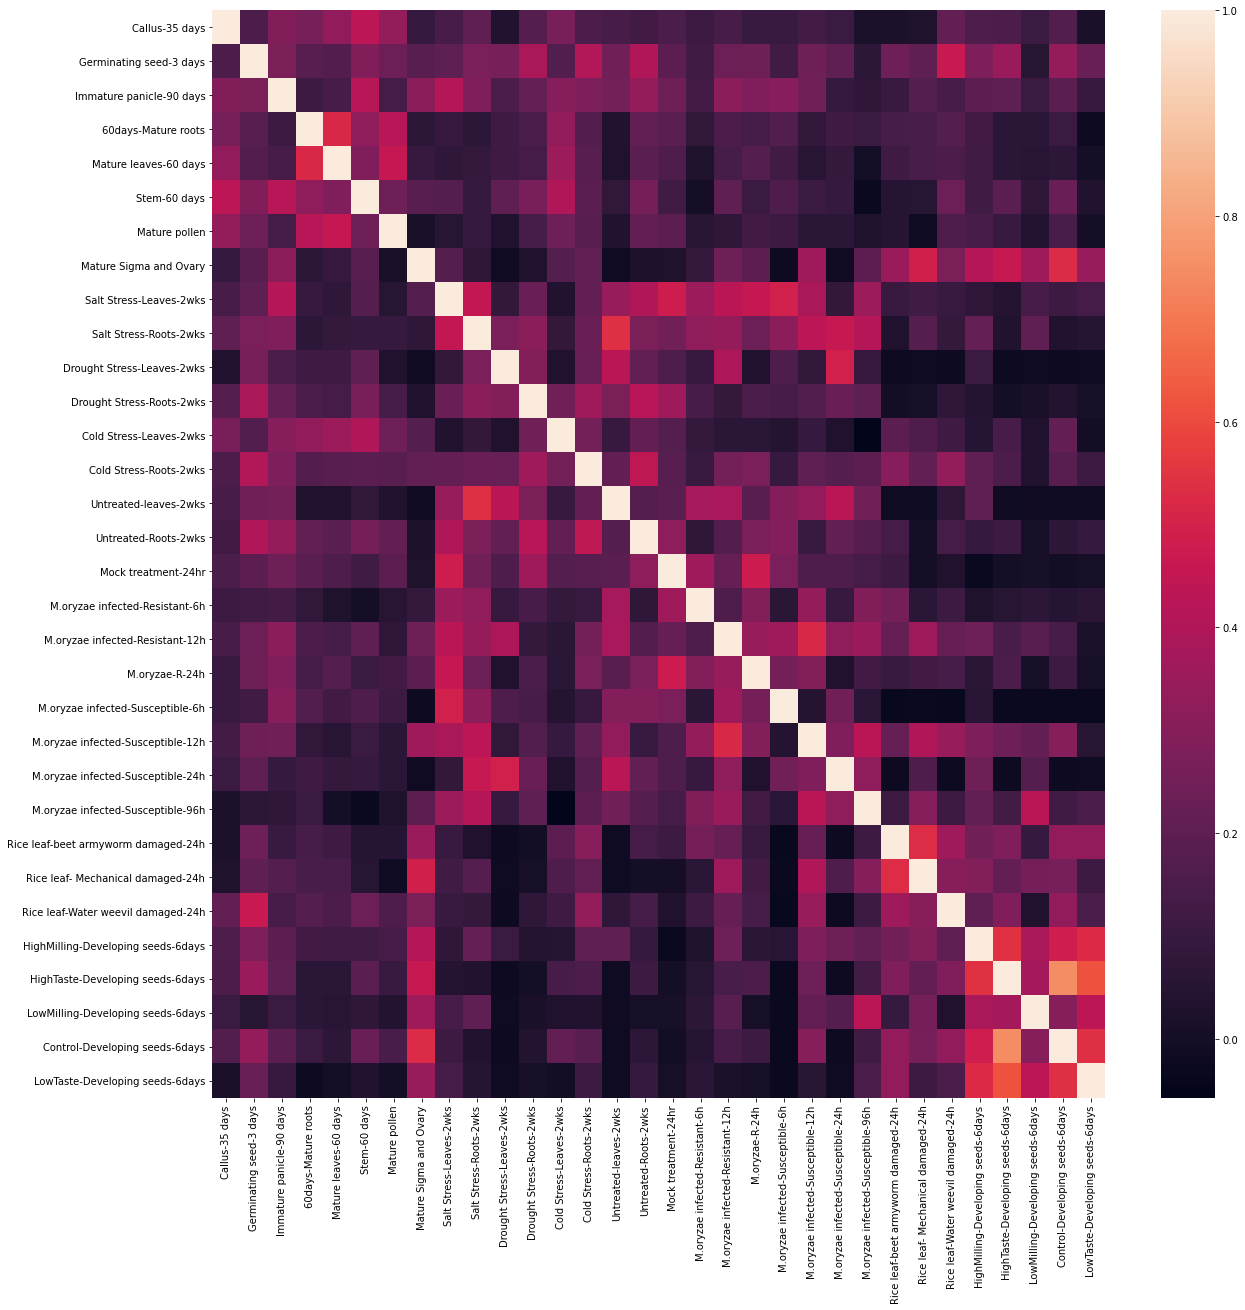

In [148]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(df5.iloc[:,16:].corr())

In [933]:
df6 = pd.read_csv('../Figures and tables/Expression Table rqtls added.csv')
df6.index = df6['Locus_id']
(df6.iloc[:,:16] + 1).applymap(np.log2).to_csv('Exp1.csv')
df6.iloc[:,16:].to_csv('Exp2.csv')

In [1112]:
df8 = (df7.iloc[:,:16] + 1).applymap(np.log2).reset_index(drop = True)
t = []
for qt in set(df7.index):
    tdf = df7.loc[qt,:]
    tdf = (tdf.iloc[:, :16] + 1).applymap(np.log2)
    sd = shc.dendrogram(shc.linkage(tdf.values, method='complete'), no_plot=True)
    sd = [int(s) for s in sd['ivl']]
    t = t + [s + len(t) for s in sd]

df8 = df8.loc[t,:]
df8.index = df7.index

In [541]:
#don't run
df8 = (df7.iloc[:,:16] + 1).applymap(np.log2).reset_index(drop = True)
sd = shc.dendrogram(shc.linkage(df8.values, method='complete'), no_plot=True)
sd = [int(s) for s in sd['ivl']]
df8 = df8.loc[sd,:]

In [1114]:
df8.describe()

Seed-5 DAP  Seed- 10 DAP  Embryo- 25 DAP  Endosperm- 25 DAP  \
count  340.000000    340.000000      340.000000         340.000000   
mean     2.572197      1.568687        2.089535           1.380540   
std      2.400545      2.170073        2.256193           2.184104   
min      0.000000      0.000000        0.000000           0.000000   
25%      0.000000      0.000000        0.000000           0.000000   
50%      2.220809      0.838702        1.661106           0.416785   
75%      4.075185      2.377379        3.463833           2.157235   
max     12.495725     13.932584       12.137017          13.820588   

       Endosperm- 25 DAP (replicate)      Anther      Pistil  \
count                     340.000000  340.000000  340.000000   
mean                        1.392923    1.908461    2.678697   
std                         2.181756    1.944391    2.262505   
min                         0.000000    0.000000    0.000000   
25%                         0.000000    0.000000    0.160648   
50%                         0.441958    1.390379    2.622985   
75%                         2.174728    3.302862    4.263634   
max                        13.830426    9.813098   10.436951   

       Pre-emergence inflorescence  Post-emergence inflorescence  \
count                   340.000000                    340.000000   
mean                      2.432934                      2.540066   
std                       2.238113                      2.221988   
min                       0.000000                      0.000000   
25%                       0.000000                      0.000000   
50%                       2.148956                      2.334295   
75%                       3.990824                      4.141388   
max                       9.898701                     10.250452   

       Leaves-20 days  Leaves- 20 days (replicate)      Shoots  \
count      340.000000                   340.000000  340.000000   
mean         2.009728                     2.117436    2.370809   
std          2.143045                     2.094901    2.187908   
min          0.000000                     0.000000    0.000000   
25%          0.000000                     0.191019    0.000000   
50%          1.435146                     1.649846    2.129625   
75%          3.578018                     3.540009    3.924426   
max         12.520152                    12.034204    9.756401   

       Seedling four-leaf stage F1 93-11/Nipp  \
count                              340.000000   
mean                                 2.113836   
std                                  1.929562   
min                                  0.000000   
25%                                  0.668657   
50%                                  1.506387   
75%                                  3.109855   
max                                 11.622564   

       Seedling four-leaf stage F1 Nipp/93-11  Seedling four-leaf stage 93-11  \
count                              340.000000                      340.000000   
mean                                 2.070541                        2.114343   
std                                  1.998588                        1.925587   
min                                  0.000000                        0.000000   
25%                                  0.467198                        0.614163   
50%                                  1.500014                        1.549197   
75%                                  3.216234                        3.094384   
max                                 11.329404                       11.411755   

       Seedling four-leaf stage   
count                 340.000000  
mean                    2.161709  
std                     2.009065  
min                     0.000000  
25%                     0.519170  
50%                     1.625825  
75%                     3.275184  
max                    12.185585

In [1118]:
df9 = pd.read_csv('../Figures and tables/Expression Table rqtls added.csv')
df9.index = df9['Locus_id']
df9 = df9.iloc[:,3:]
df9 = (df9.iloc[:,:16] + 1).applymap(np.log2)

In [1111]:
zzd

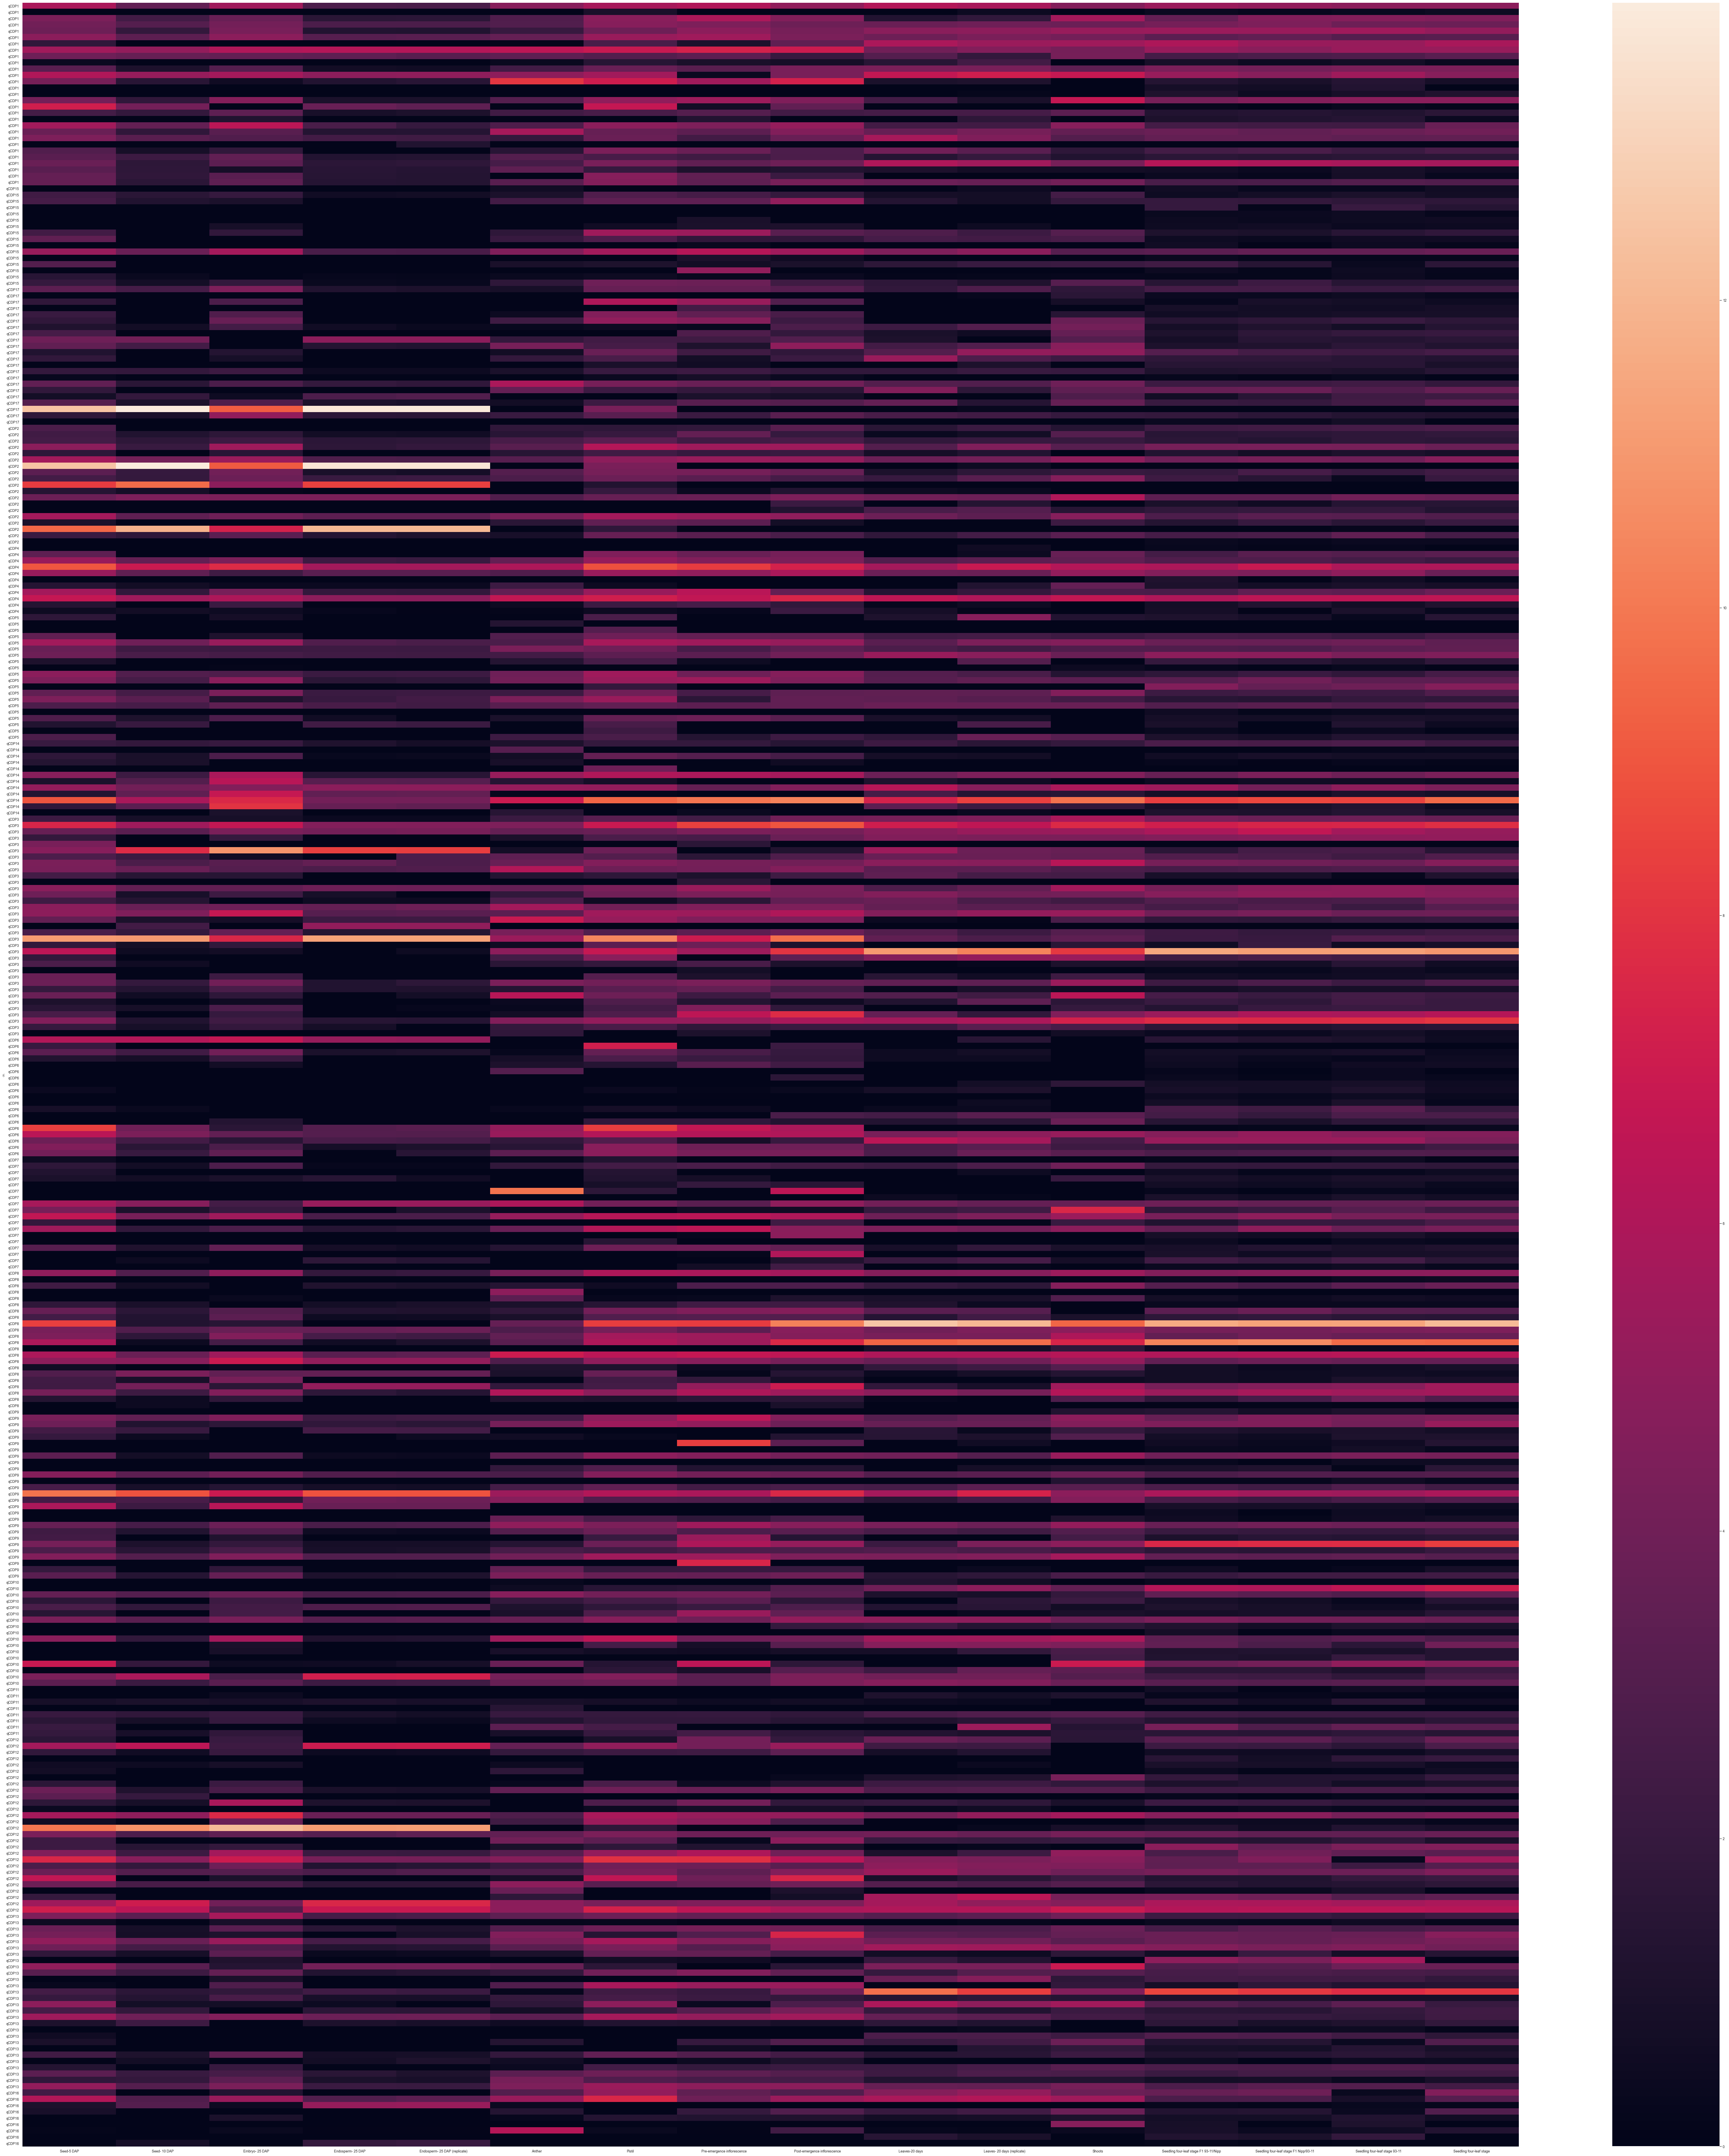

In [1115]:
fig, ax = plt.subplots(figsize=(85,100))
sb.set_context("paper", rc={"font.size":1,"axes.titlesize":8,"axes.labelsize":5})   
sb.heatmap(df8).get_figure().savefig("../Figures and tables/ExpRNAseq3.png")

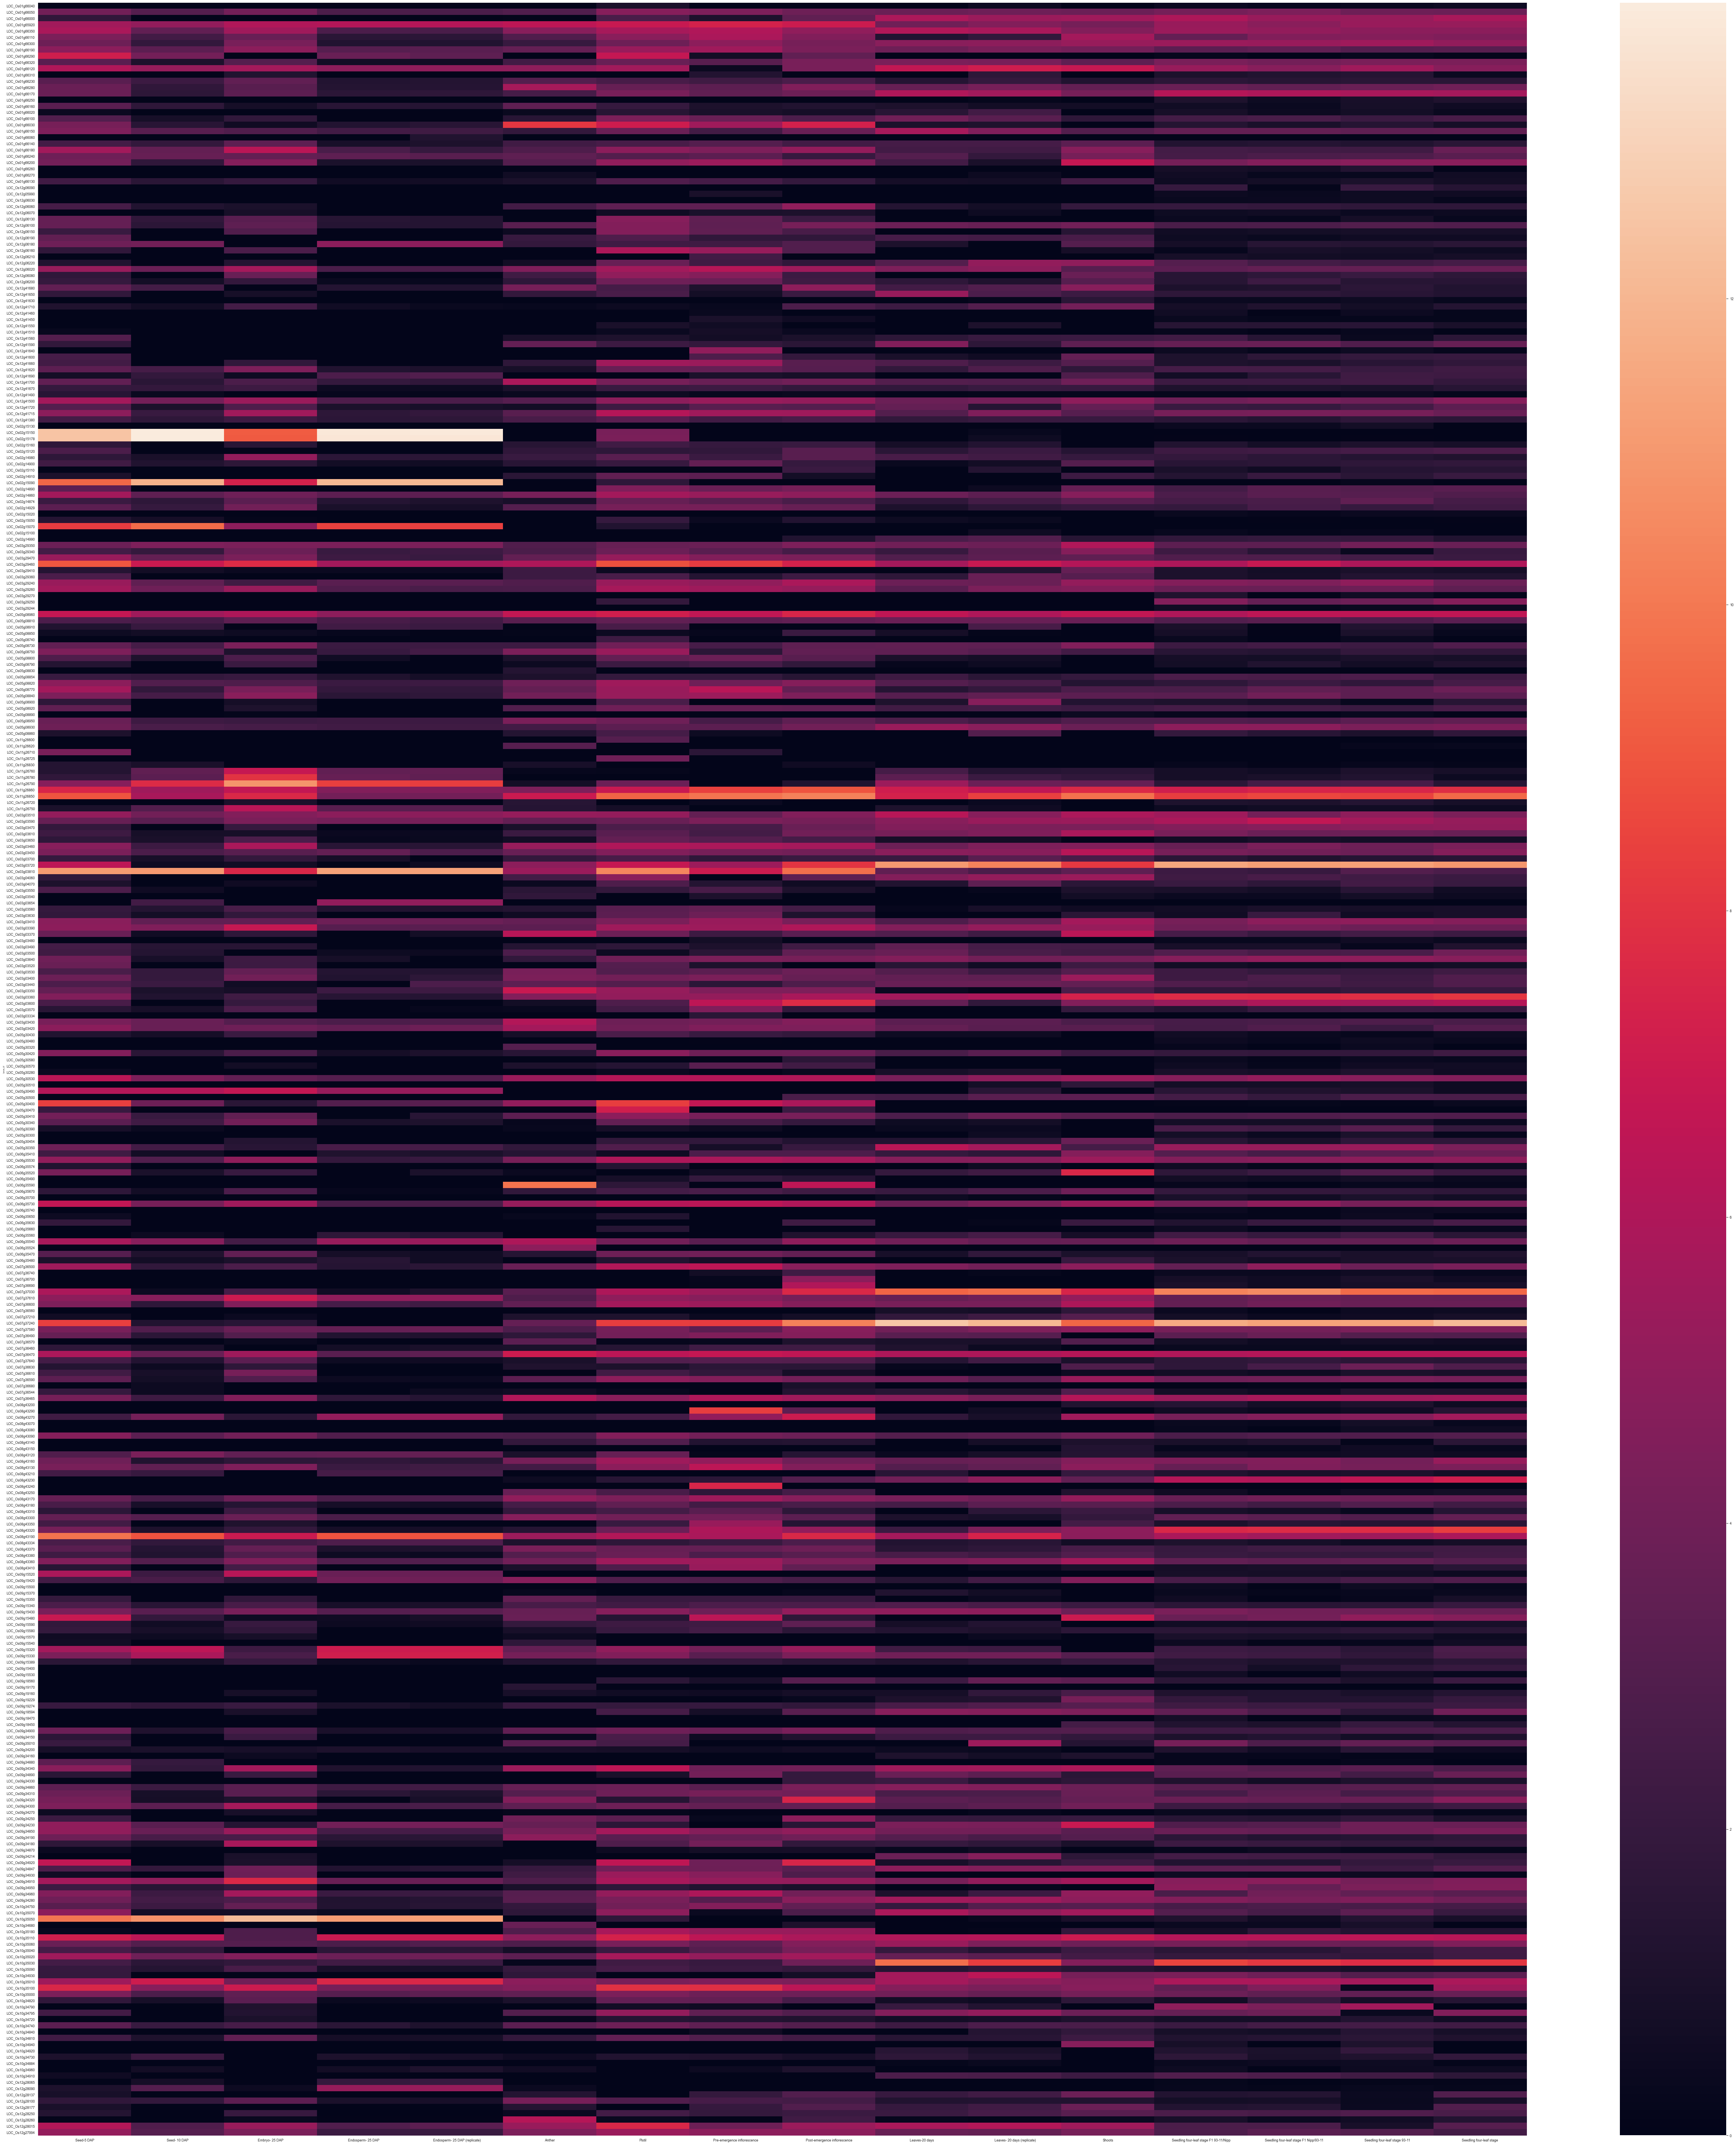

In [1119]:
fig, ax = plt.subplots(figsize=(85,100))
sb.set_context("paper", rc={"font.size":1,"axes.titlesize":8,"axes.labelsize":5})   
sb.heatmap(df9).get_figure().savefig("../Figures and tables/ExpRNAseql2.png")

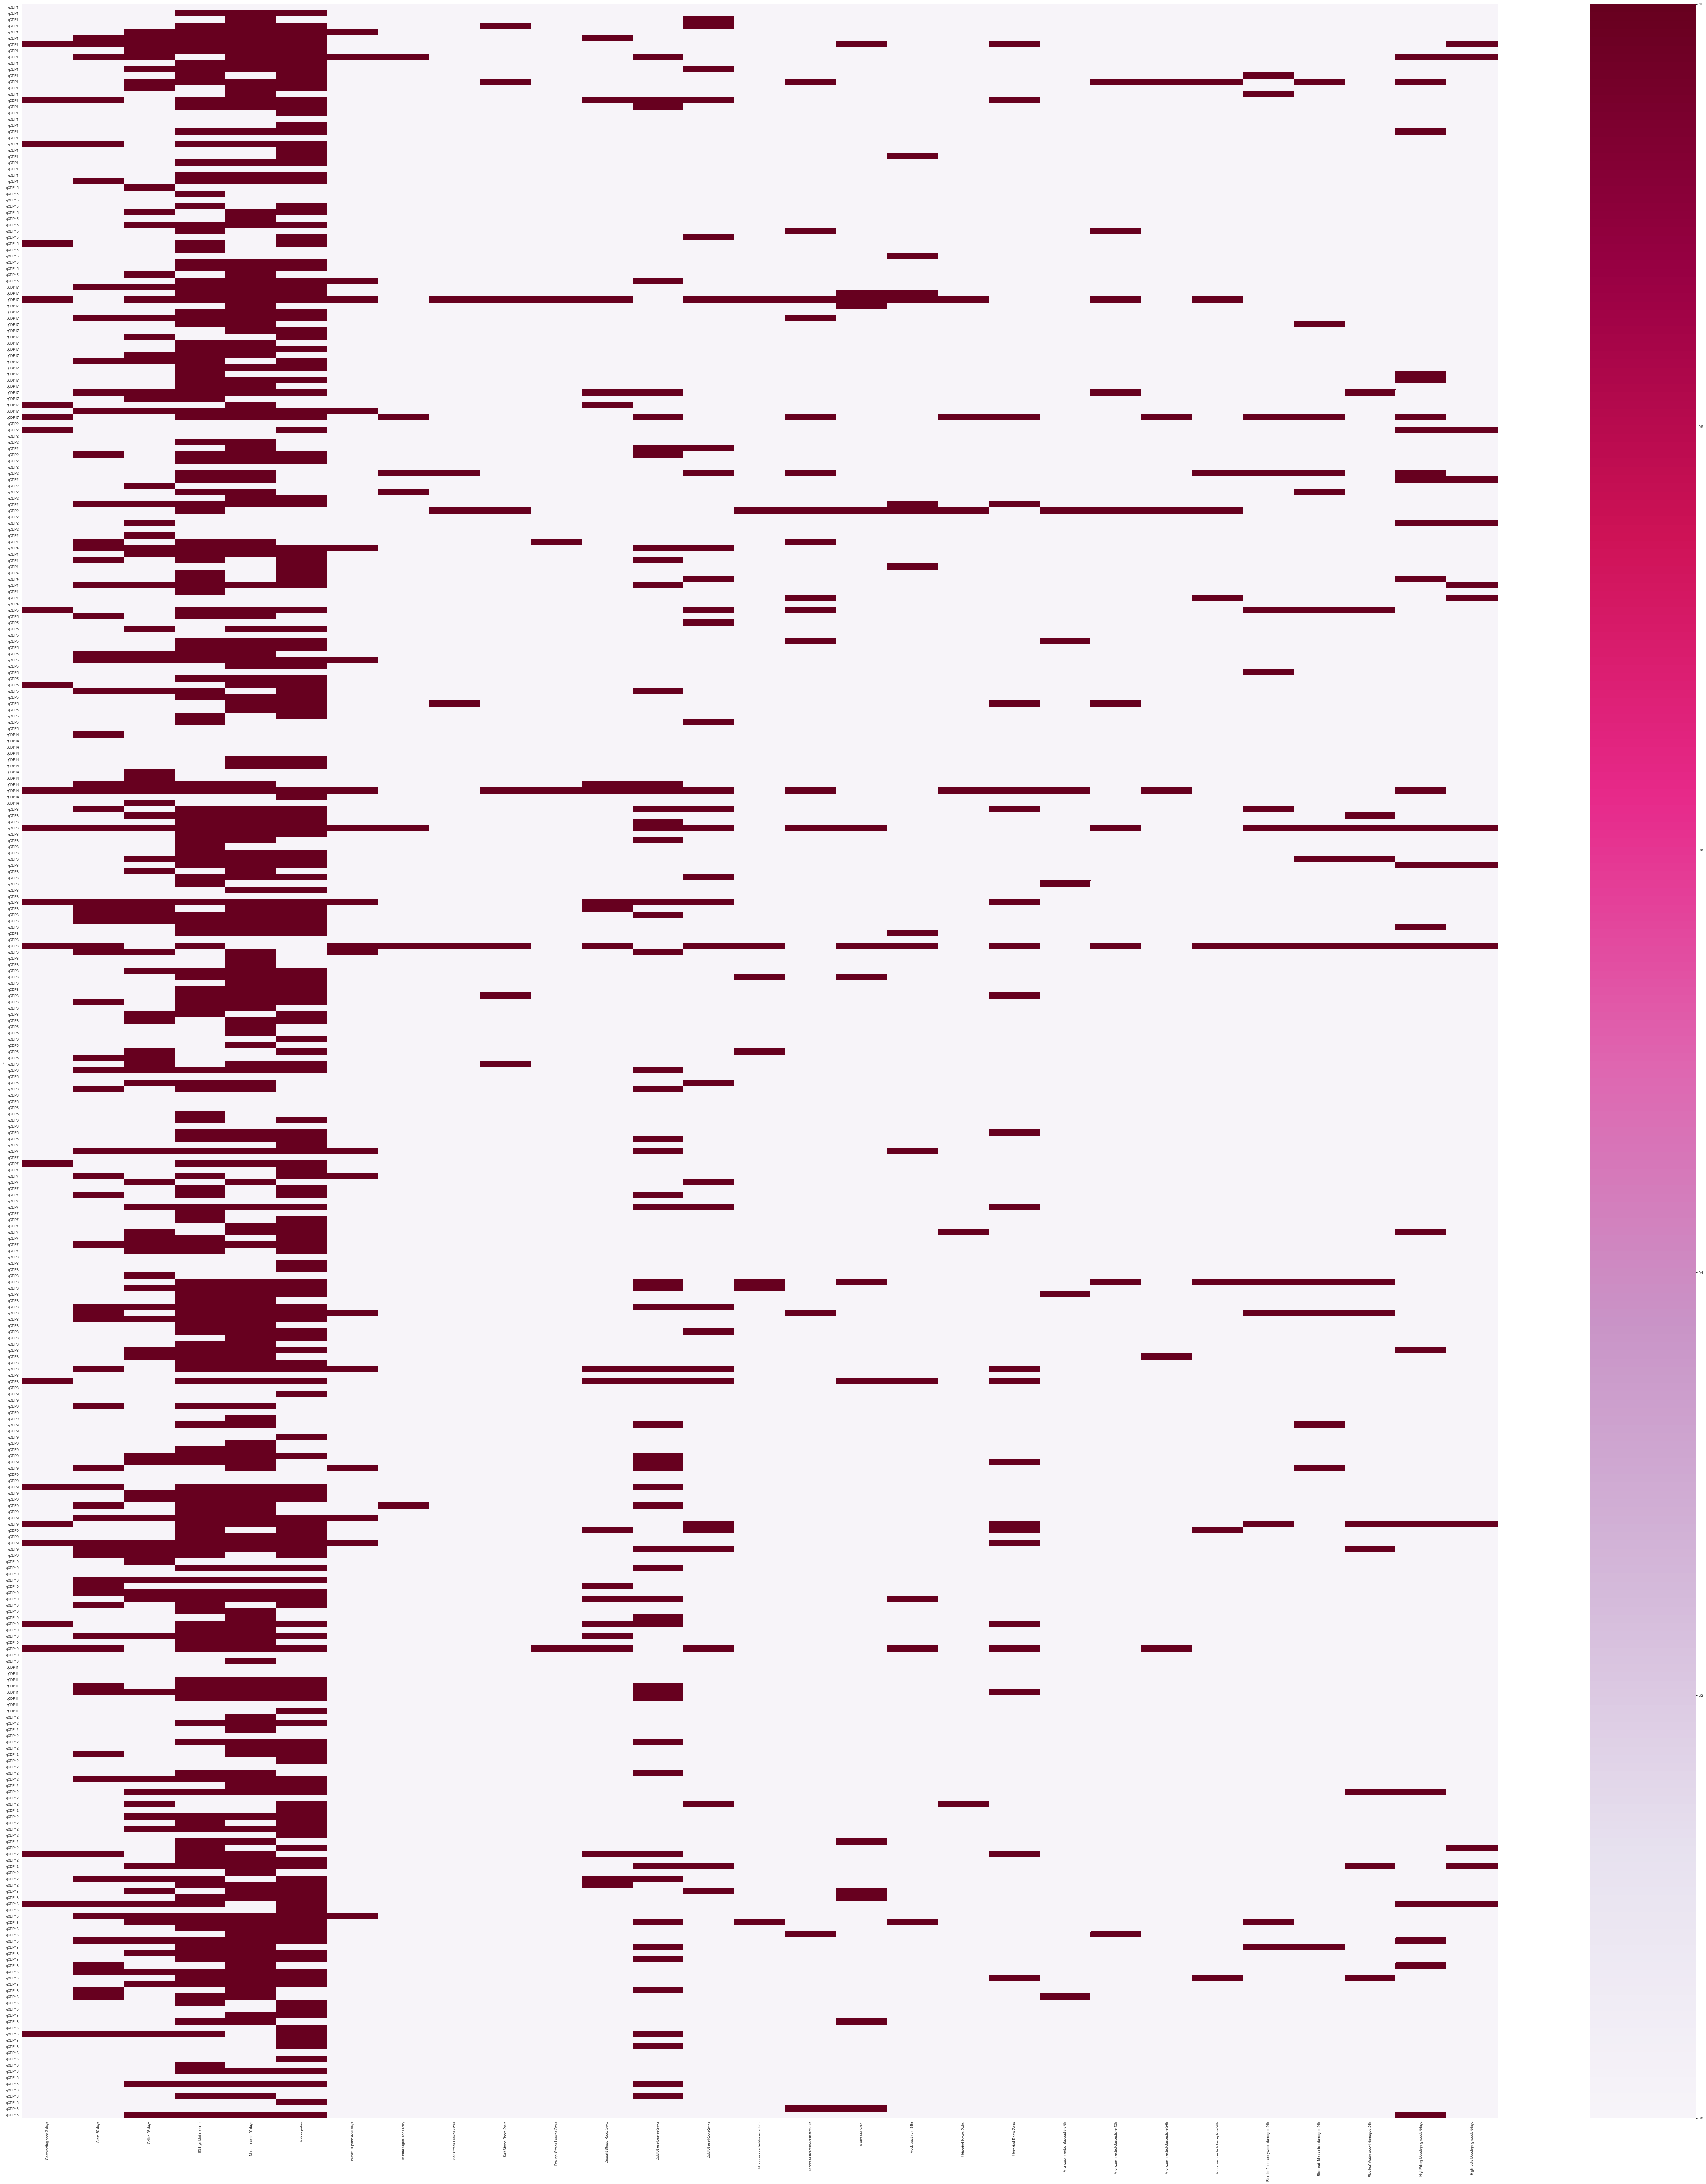

In [1116]:
fig, ax = plt.subplots(figsize=(85,100))
sb.heatmap(df7.iloc[:,16:], cmap = 'PuRd').get_figure().savefig("../Figures and tables/ExpDGE3.png")

In [945]:
df9 = (df9.iloc[:,:16] + 1).applymap(np.log2)

In [677]:
ldf = pd.read_table('../../Data/LD/WF1M20 (1).stat')
ldfi = pd.read_table('../../Data/LD/WF2indR7 (1).stat')
ldfa = pd.read_table('../../Data/LD/WF2ausR7 (1).stat')

In [711]:
#ldf[80000:]
#ldfi[50000:]
#ldfa[110000:]

#Dist  Mean_r^2  Mean_D'    Sum_r^2  Sum_D'  NumberPairs
110000  110001    0.4050      NaN  2890.4057     NaN         7137
110001  110002    0.4098      NaN  2932.9722     NaN         7157
110002  110003    0.4018      NaN  2808.6780     NaN         6991
110003  110004    0.3982      NaN  2814.3194     NaN         7068
110004  110005    0.3990      NaN  2887.9897     NaN         7238
...        ...       ...      ...        ...     ...          ...
299995  299996    0.2784      NaN  1763.7611     NaN         6335
299996  299997    0.2756      NaN  1776.0708     NaN         6445
299997  299998    0.2772      NaN  1705.3858     NaN         6152
299998  299999    0.2765      NaN  1774.7962     NaN         6418
299999  300000    0.2755      NaN  1773.9759     NaN         6438

[190000 rows x 6 columns]

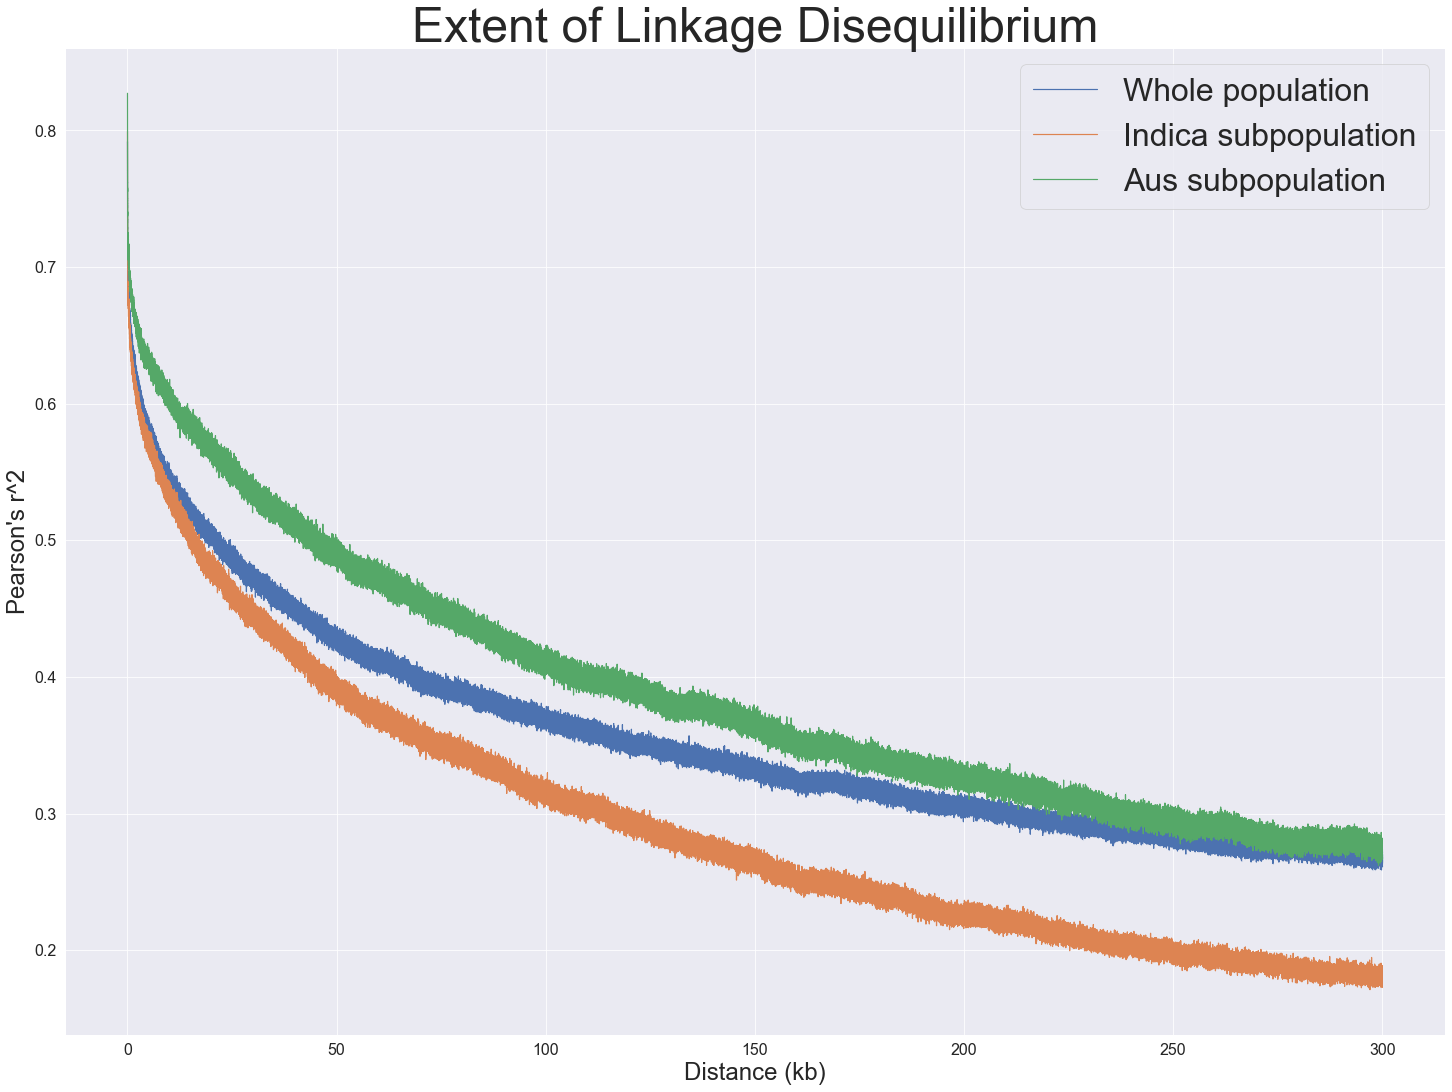

In [689]:
plt.rcParams["figure.figsize"] = (20,15)
plt.plot(ldf.index/1000, ldf['Mean_r^2'], label = 'Whole population', marker=".", markersize = 0.1)
plt.tight_layout()
plt.plot(ldfi.index/1000, ldfi['Mean_r^2'], label = 'Indica subpopulation', markersize = 0.1)
plt.plot(ldfa.index/1000, ldfa['Mean_r^2'],  label = 'Aus subpopulation', markersize = 0.1)
plt.xlabel('Distance (kb)', fontsize = 24)
plt.ylabel('Pearson\'s r^2', fontsize = 24)
plt.title('Extent of Linkage Disequilibrium', fontsize = 48)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 32)
plt.tight_layout()
plt.savefig('../Figures and tables/LD.png')